# 1. Analysis & Planning Stage


# General Overview

We consider the problem of determining some areas in NYC, from which people pay more tips to NYC cabs. Therefore, we are interested in defining the meaning of "pay more tips" as well as "how much more is". To devise this solution we are using open sourced data from the NYC Taxi and Limousine Commission, which includes valuable information about all trips completed by cabs in NYC in June 2015. The structure of our solution focus on performing four core stages comprising: 1) Analysis and Planning 2) Development and Optimisation 3) Conclusion and Report and 4) Release and Presentation. Thus, rather than conducting full-fledged research, we are aimed at communicating our perspective of a possible solution to this ambitious problem by using some machine learning techniques, and discussing the substantial benefits and disavantages of the approach developed.



# 1.1 Dataset

As mentioned before, the dataset consists of information about 12,324,935 trips completed by cabs in NYC during June 2015. The raw data, contained in a .csv file, includes 19 fields in total with data like pickup time, number of passengers, tip amounts, and so on.  


# 1.2 Main Tools

We are using Python through Jupyter as the main programming language to build our solution. Subsequently, we take advantage of the following libraries:

    * Petl
    * matplotlib
    * Seaborn
    * scikit-learn
    * Pandas
    * NumPy
    
Similarly, we are going to use Github to release our solution in the repository https://github.com/Riccocez/NYC-Taxi-Tips.git


 

# 1.3 Raw Data Analysis 

We start the solution of the problem by analysing the raw data contained in the dataset. With this analysis we want to find possible inconsistencies, typos or non-informative data that we can remove when cleaning up the dataset.

# 1.3.1 Raw Data Visualisation and Filtering

First we are going to take a look at some of the trips contained in the raw data

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import random

from petl import fromcsv, look, fieldnames, values, head, tail

import seaborn as sns

Therefore, we get the size of the dataset: 12,324,935 entries


In [5]:
raw_data = pd.read_csv('yellow_tripdata_2015-06.csv', skipinitialspace=True)
print "Number of trips registered: ", len(raw_data)

Number of trips registered:  12324935


And we also get the references that characterise each trip. By analysing the dataset, we realise that we have 19 sorts of data:

     1) VendorID
     2) tpep_pickup_datetime
     3) tpep_dropoff_datetime
     4) passenger_count
     5) trip_distance
     6) pickup_longitude
     7) pickup_latitude
     8) RateCodeID
     9) store_and_fwd_flag
    10) dropoff_longitude
    11) dropoff_latitude
    12) payment_type
    13) fare_amount
    14) extra
    15) mta_tax
    16) tip_amount
    17) tolls_amount
    18) improvement_surcharge
    19) total_amount

In [12]:
raw_data.head(n=5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0,0.5,0.00,0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0,0.5,1.00,0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0,0.5,2.20,0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0,0.5,2.86,0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0,0.5,0.00,0,0.3,10.30


Considering the numeric type of data contained in the dataset, we perform a simple statistical analysis to determine informative outputs like mean, standard deviation, as well as maximum and minimum values. 

The purpose of this analysis is to:
    
       1) Determine the range of tips: Which apparently comprises between $-80.00 to $980.91. 
       2) Find possible outliers: We have already detected some of them ($-80.00 and $980.91 don't seem to be tip amounts commonly paid for an average passenger).
       3) Discover some potential correlations in data: Other types of information like fare_amount and trip distance can be potentially correlated. They can be auxiliary references to filter possible outliers within the dataset.

In [7]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000
mean,1.523565,1.681898,11.829076,-72.913847,40.166867,1.041832,-72.944737,40.184784,1.379517,13.204085,0.323405,0.497618,1.736538,0.316152,0.299721,16.378268
std,0.499444,1.335180,7678.550287,8.796762,4.843162,0.581957,8.669562,4.777574,0.499528,106.076575,0.480415,0.042148,2.637613,1.542573,0.012164,106.382788
min,1.000000,0.000000,0.000000,-759.233337,-67.136963,1.000000,-754.166687,-16.177874,1.000000,-300.000000,-30.500000,-0.500000,-80.000000,-14.000000,-0.300000,-300.000000
25%,1.000000,1.000000,1.010000,-73.991898,40.736141,1.000000,-73.991302,40.734627,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.750000,-73.981537,40.753235,1.000000,-73.979622,40.753799,1.000000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.230000,-73.966461,40.767929,1.000000,-73.962479,40.768787,2.000000,15.000000,0.500000,0.500000,2.350000,0.000000,0.300000,18.300000
max,2.000000,9.000000,10083318.000000,149.028534,69.702576,99.000000,125.535568,483.450012,5.000000,335413.690000,652.420000,60.350000,980.910000,900.970000,0.700000,335414.490000


The statistical analysis shows some extreme values that are very unlikely to be part of a given distribution. The most critical outliers are in:
    
    1) passenger_count
    2) trip_distance
    3) payment_type
    4) fare_amount
    5) extra
    6) mta_tax
    7) tip_amount
    8) tolls_amount
  
We are going to graphically analyse these fields to realise which values are outliers, and consequently, altering the distribution of the dataset.



# 1.3.2 Tip Amount Distribution

We consider tip_amount is clearly a reasonable reference to based our analysis. Therefore, this feature will be analysed in a scatter plot. The y-axis represents the corresponding tip amount to each of the 12 million trips contained in the dataset, which are represented in the x_axis.

In [177]:
tip_amounts = raw_data['tip_amount']
trip_IDs = [i for i in raw_data['tip_amount']]



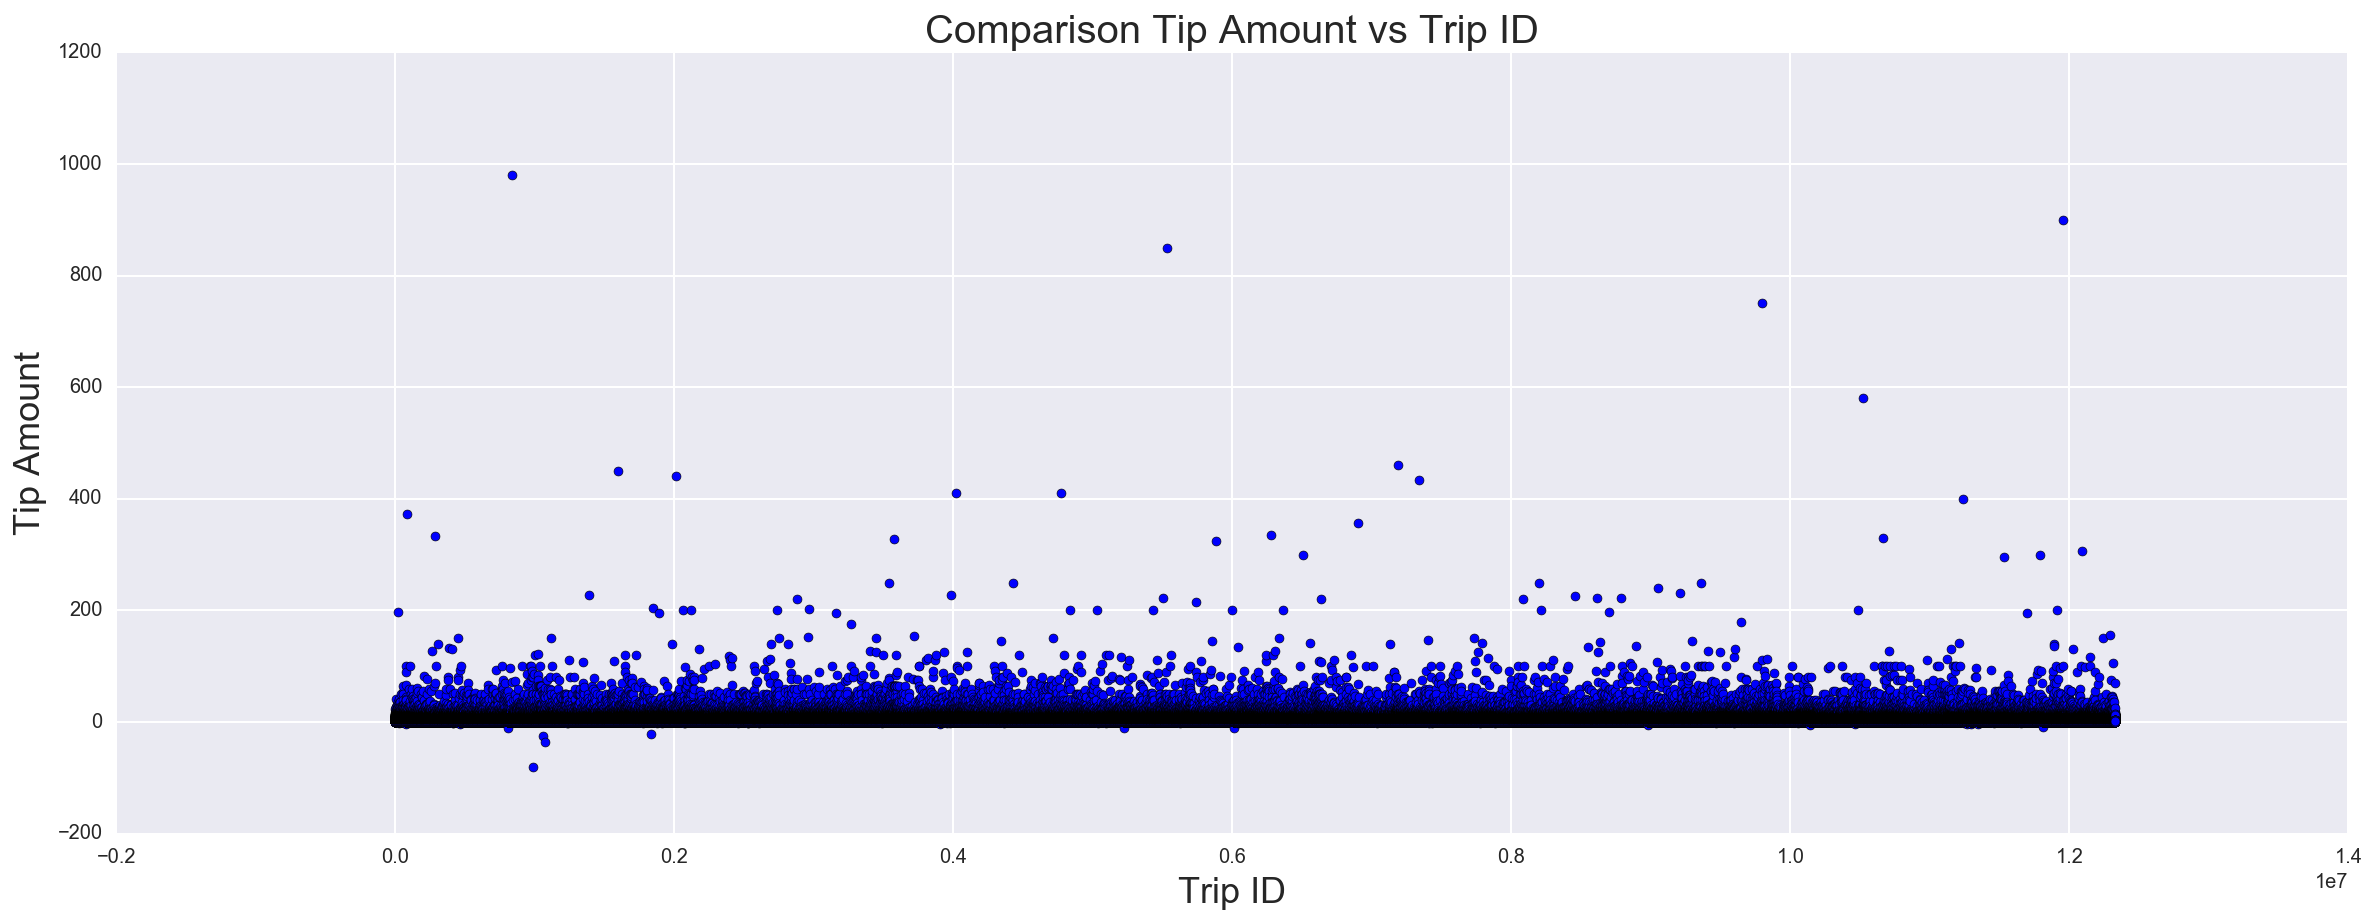

In [9]:
plt.figure(figsize=(20, 7))
plt.scatter(trip_IDs, tip_amounts)
plt.xlabel('Trip ID', fontsize = 14)
plt.ylabel('Tip Amount', fontsize = 14)
plt.title('Comparison Tip Amount vs Trip ID', fontsize = 16)
plt.show()

Based on this plot, we consider that highly potential outliers might be those not included in the range from \$0 to \$100. Nevertheless, we want to make sure that this assumption keeps describing the most representative values of the tip_amount distribution.

We compare the tip_amount with the fare_amount and the toll_amount before defining any boundaries to clean-up the dataset.

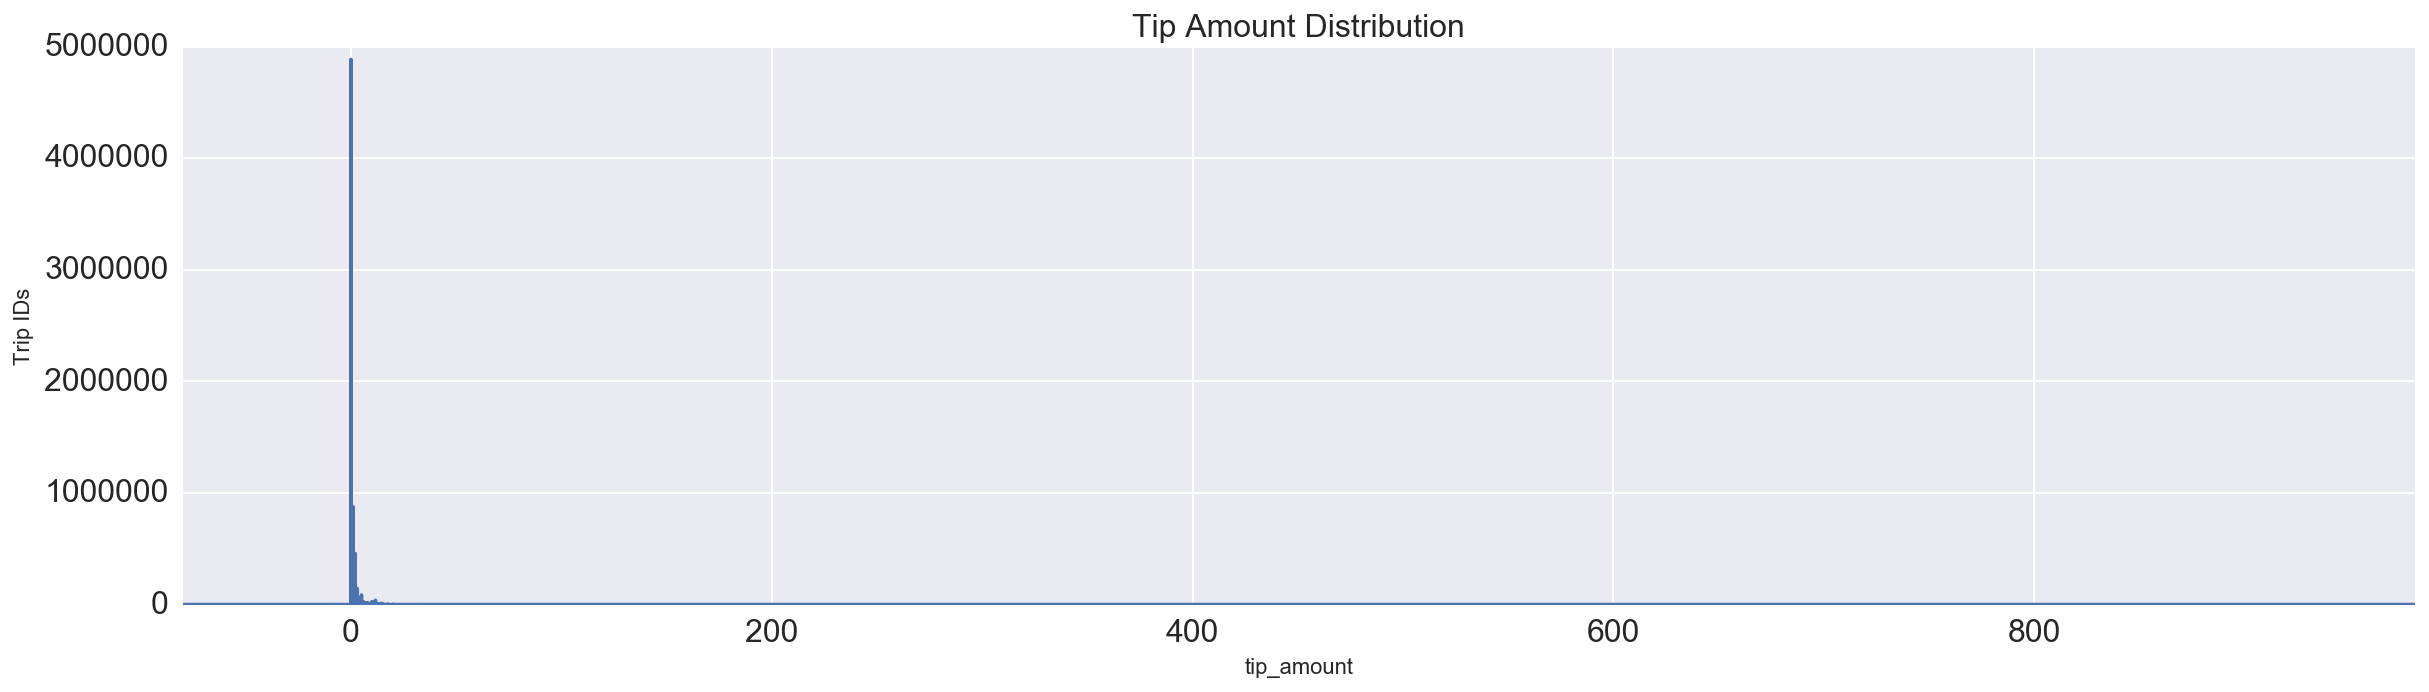

In [204]:
axes_tip = raw_data.groupby(['tip_amount']).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_tip.set_title('Tip Amount Distribution', fontsize = 16)
axes_tip.set_ylabel('Trip IDs')

From this distribution, it is noticeable that the most representative data is in the range \$0 and \$30, being \$0 the most common tip_amount with over 4.5 million trips.

ONLY in the plot below, we exclude the trips with no tip ( \$0 ) to have a better picture of the most representative tip amounts. We focus on the distribution bigger than \$0 and lower than/equal to \$30. We find that this range is a good aproximation to cover the most important values of tip amounts.   


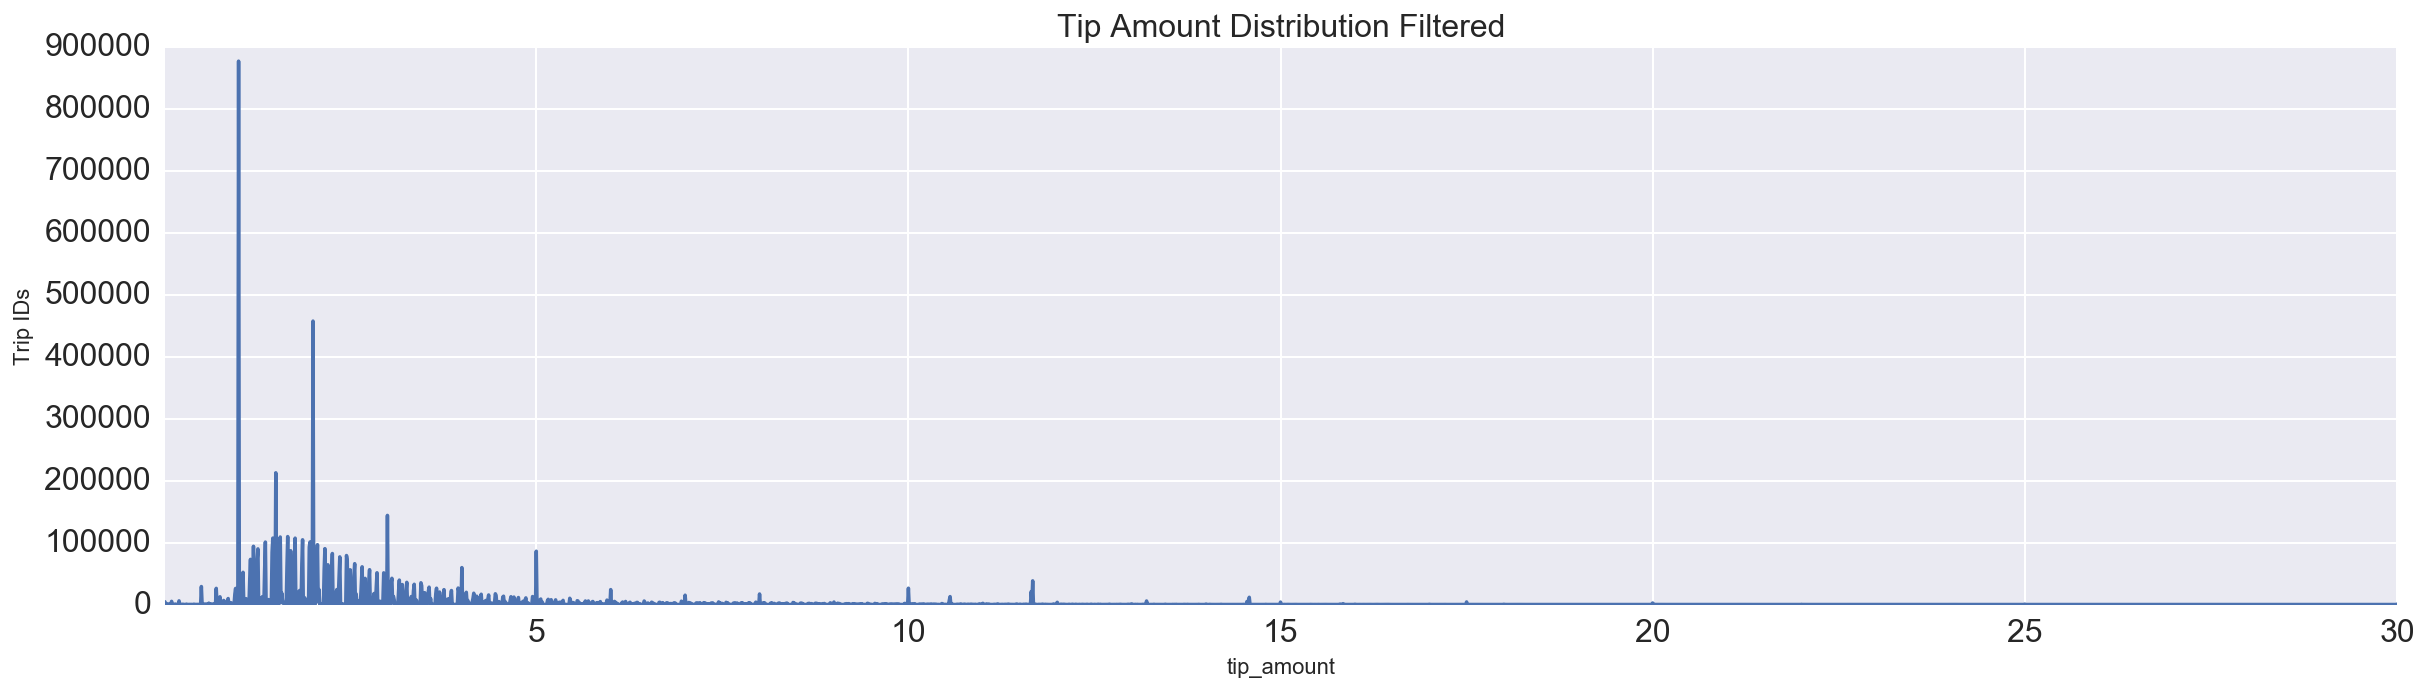

In [280]:
filtered_data = raw_data.loc[(raw_data.tip_amount > 0 ) & (raw_data.tip_amount <= 30)]
zoom_axes_tip = filtered_data.groupby(['tip_amount'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_tip.set_title('Tip Amount Distribution Filtered', fontsize = 16)
zoom_axes_tip.set_ylabel('Trip IDs')

After filtering the data with the range of tip amounts, we have almost 7.5 million of trips. Hence, we use the same approach to analyse the 7 remaining fields with outliers, which we already identified before.

In [270]:
print 'Number of trips: ', len(filtered_data)

Number of trips:  7436977



# 1.3.3 Fare Amount Distribution

Now it is time to analyse the fare amount distribution, which according to the following two plots and using the same analysis of 1.3.2, it is mostly concentrated within \$0 to \$80. 

We illustrate fare amounts of the ~7.45 million trips filtered in 1.3.2.

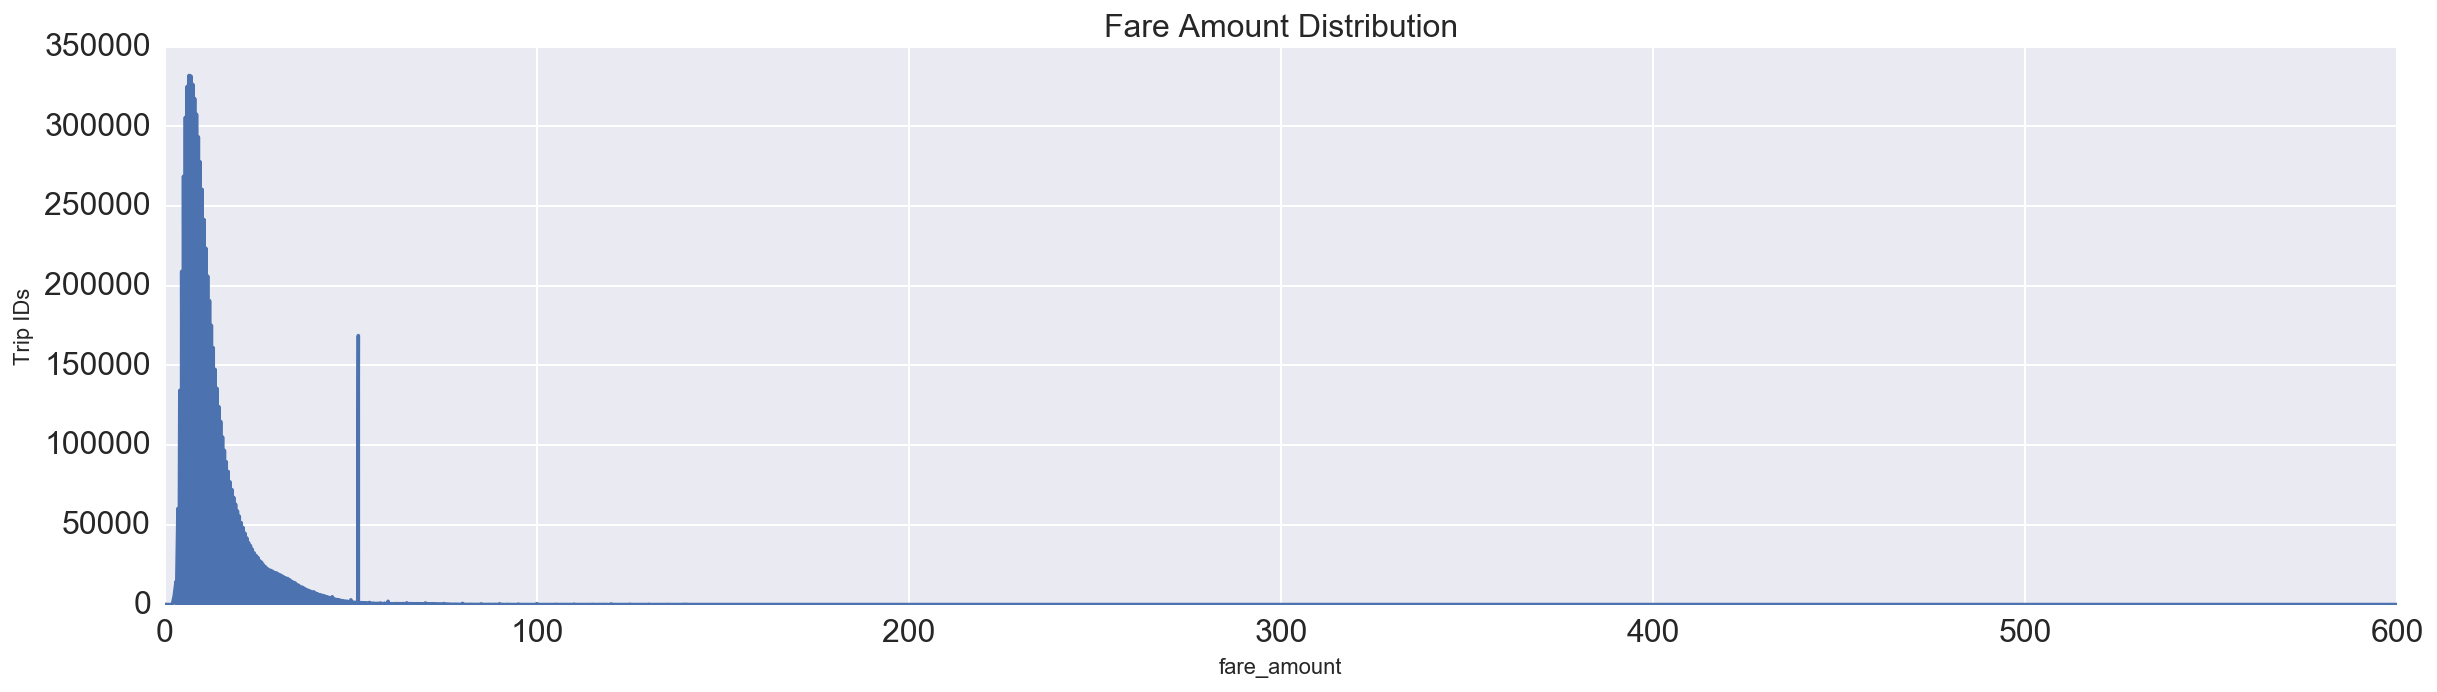

In [254]:
axes_fare = filtered_data.groupby(['fare_amount'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_fare.set_title('Fare Amount Distribution', fontsize = 16)
axes_fare.set_ylabel('Trip IDs')

A representative range of data should consider fare amounts between \$0 to \$80. We confirm this consideration with the distribution shown below.

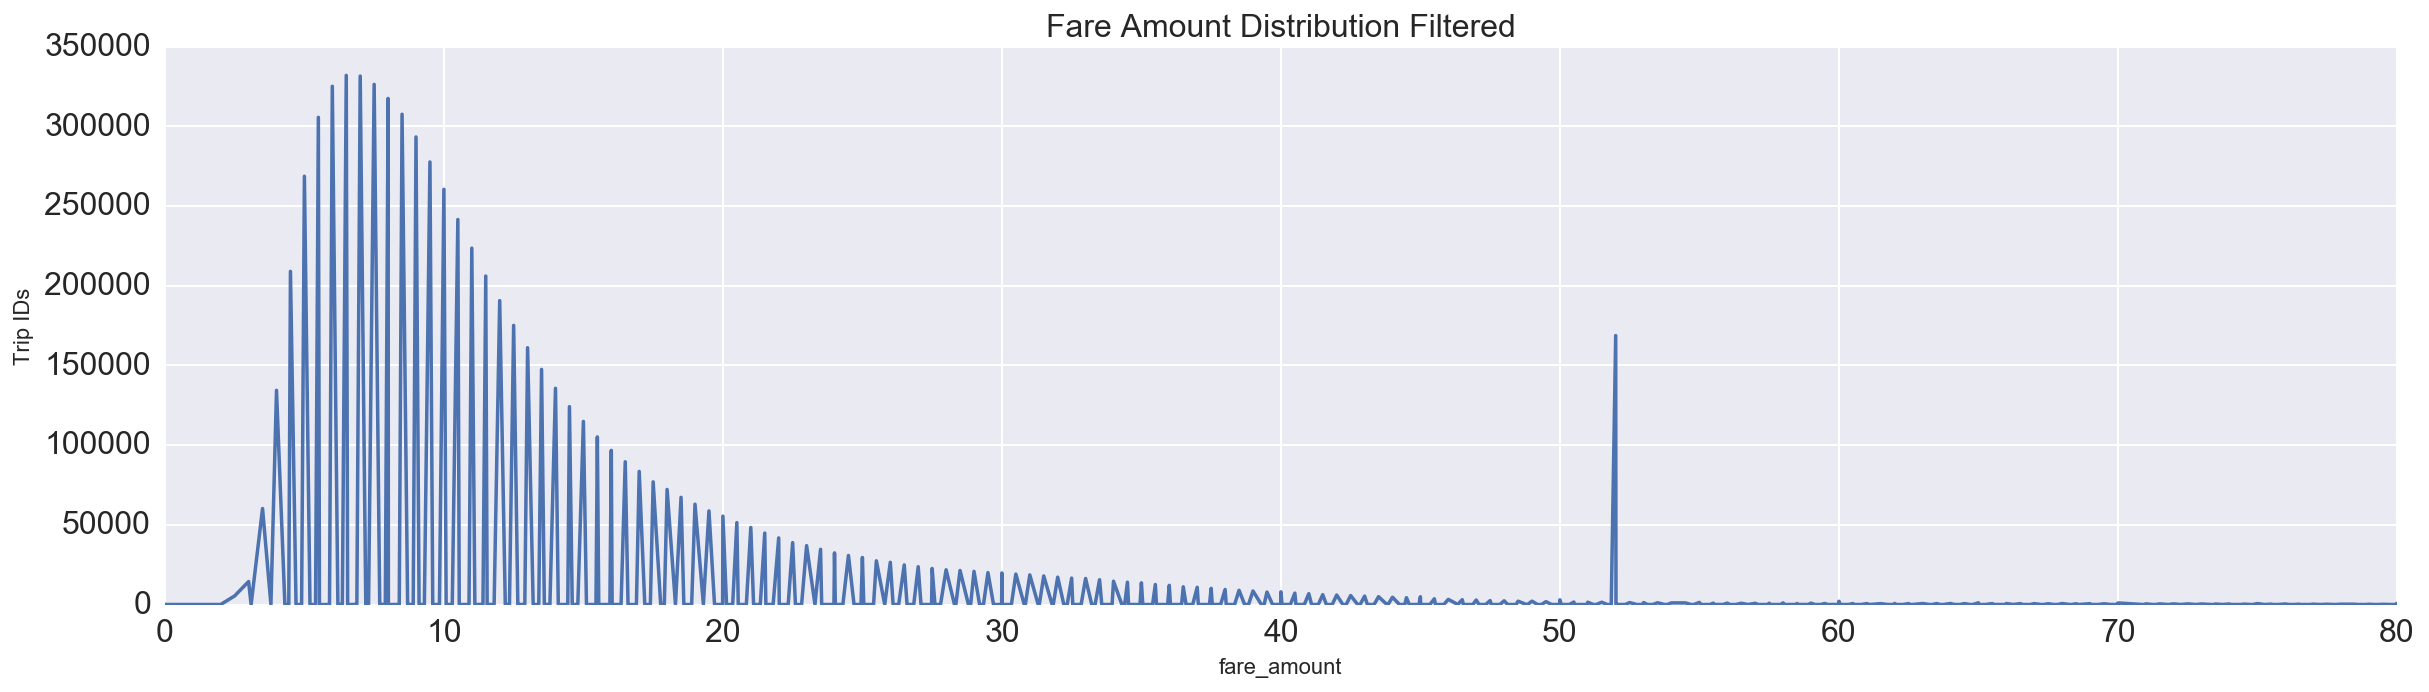

In [337]:
fare_filter_data = filtered_data.loc[(filtered_data.fare_amount >= 0 ) & (filtered_data.fare_amount <= 80)]
zoom_axes_fare = fare_filter_data.groupby(['fare_amount'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_fare.set_title('Fare Amount Distribution Filtered', fontsize = 16)
zoom_axes_fare.set_ylabel('Trip IDs')

Implementing this new filter to the dataset, we notice that we have discriminated few number of trips.

In [338]:
print 'Number of outliers filtered: ', len(filtered_data) - len(fare_filter_data) 

Number of outliers filtered:  7523


# 1.3.4 Trip Distance Distribution

The Trip Distance distribution of the remainig trips indicates most of the trip distance journeys are close to 0 miles.

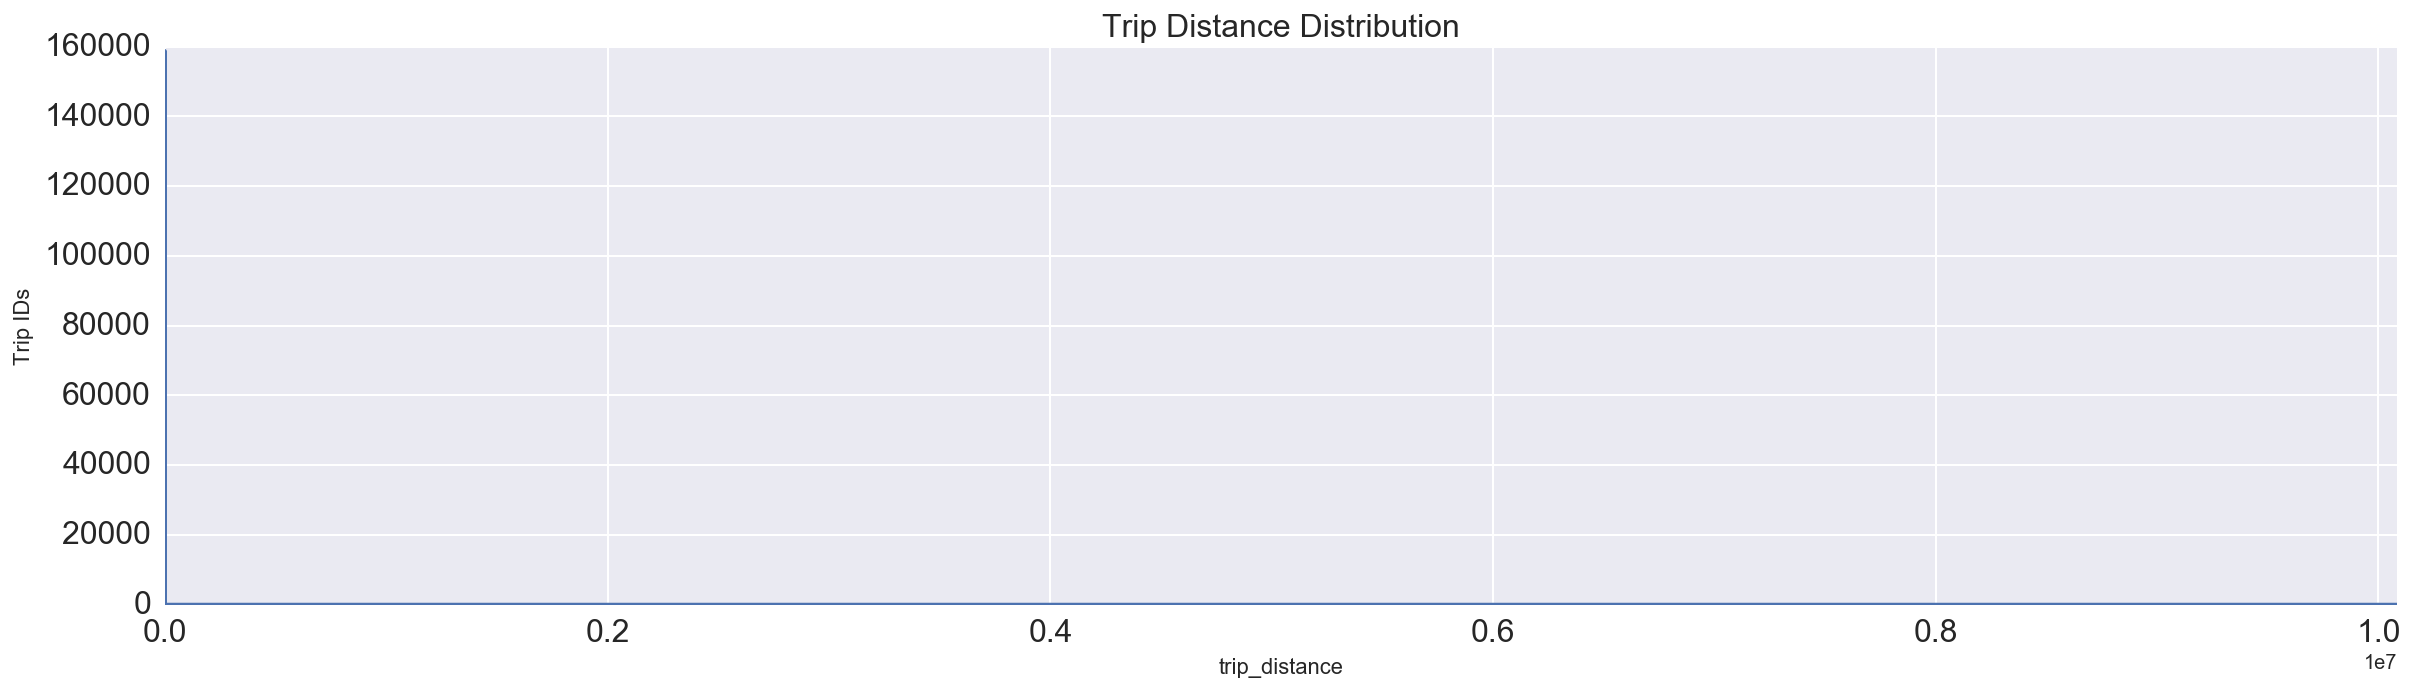

In [339]:
axes_trip_d = fare_filter_data.groupby(['trip_distance'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_trip_d.set_title('Trip Distance Distribution', fontsize = 16)
axes_trip_d.set_ylabel('Trip IDs')

We focus on the distance comprised between 0 to 23 miles, and found this estimated range provides the most representative distances from the performed trips. 

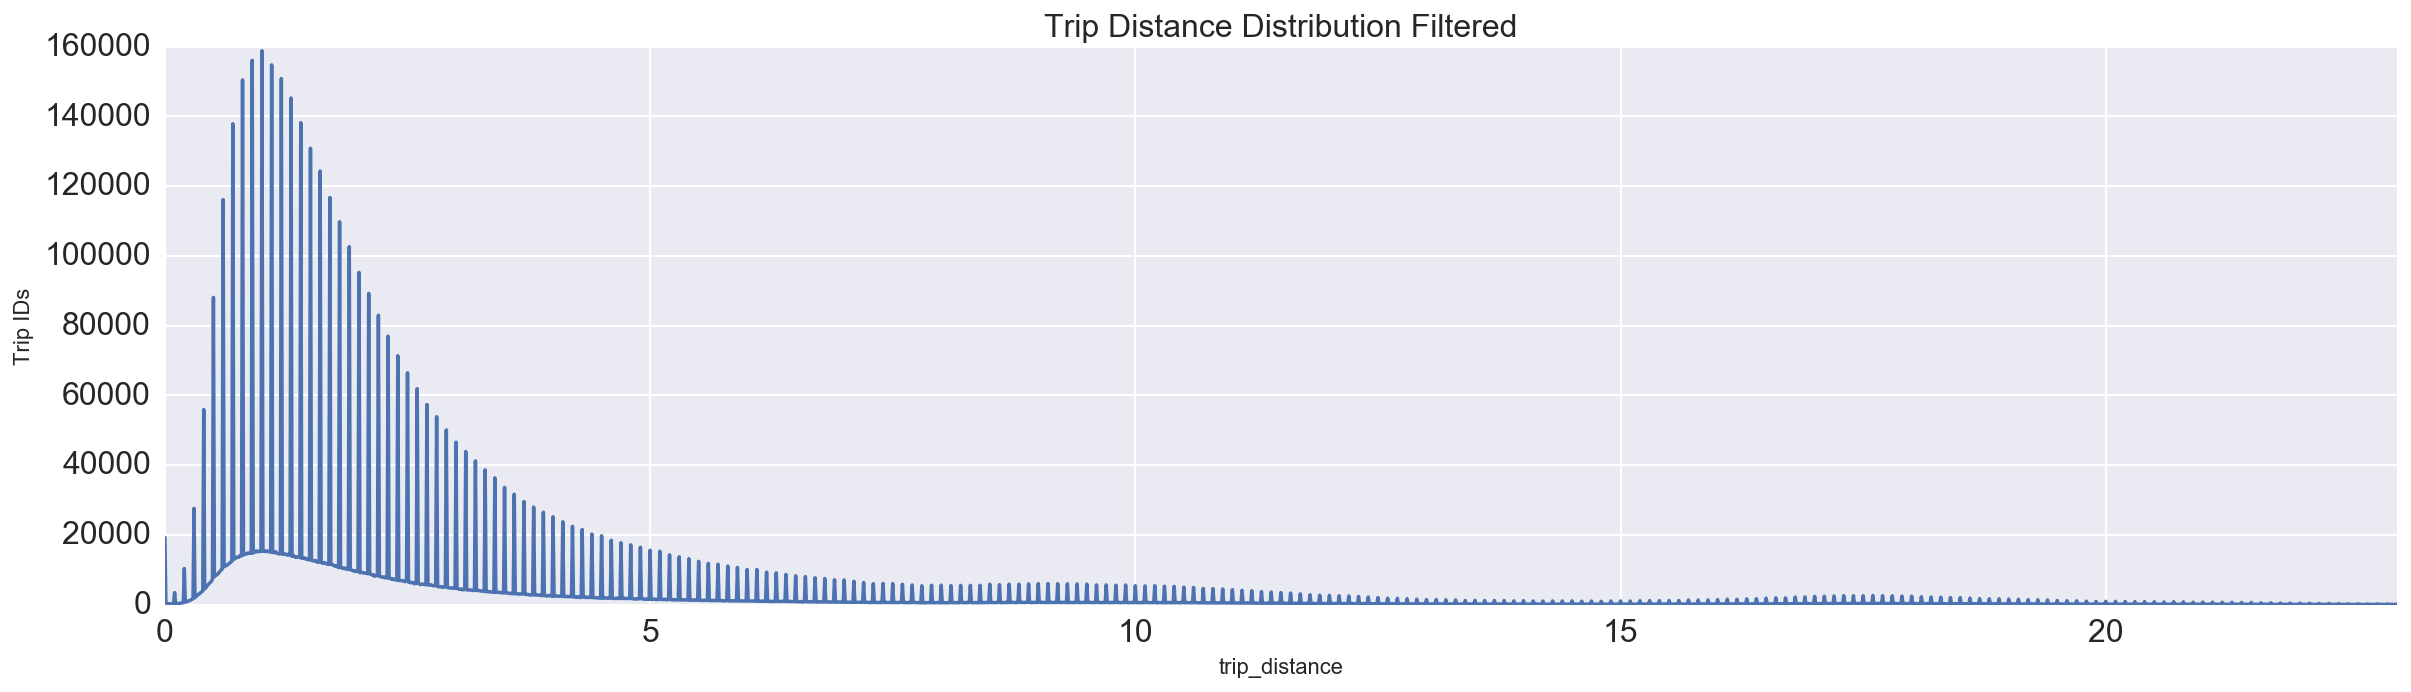

In [343]:
trip_d_data = fare_filter_data.loc[(fare_filter_data.trip_distance >= 0 ) & (fare_filter_data.trip_distance <= 23)]
zoom_axes_trip_d = trip_d_data.groupby(['trip_distance'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_trip_d.set_title('Trip Distance Distribution Filtered', fontsize = 16)
zoom_axes_trip_d.set_ylabel('Trip IDs')

The result of this filter comprises filtering almost 7000 outliers that do not meet the criteria established above.

In [345]:
 print 'Number of outliers filtered: ', len(fare_filter_data) - len(trip_d_data)

Number of outliers filtered:  6718


# 1.3.5 Tolls Amount Distribution

From the tolls amount distribution most of the trips do not pay any tolls amount when making a trip.

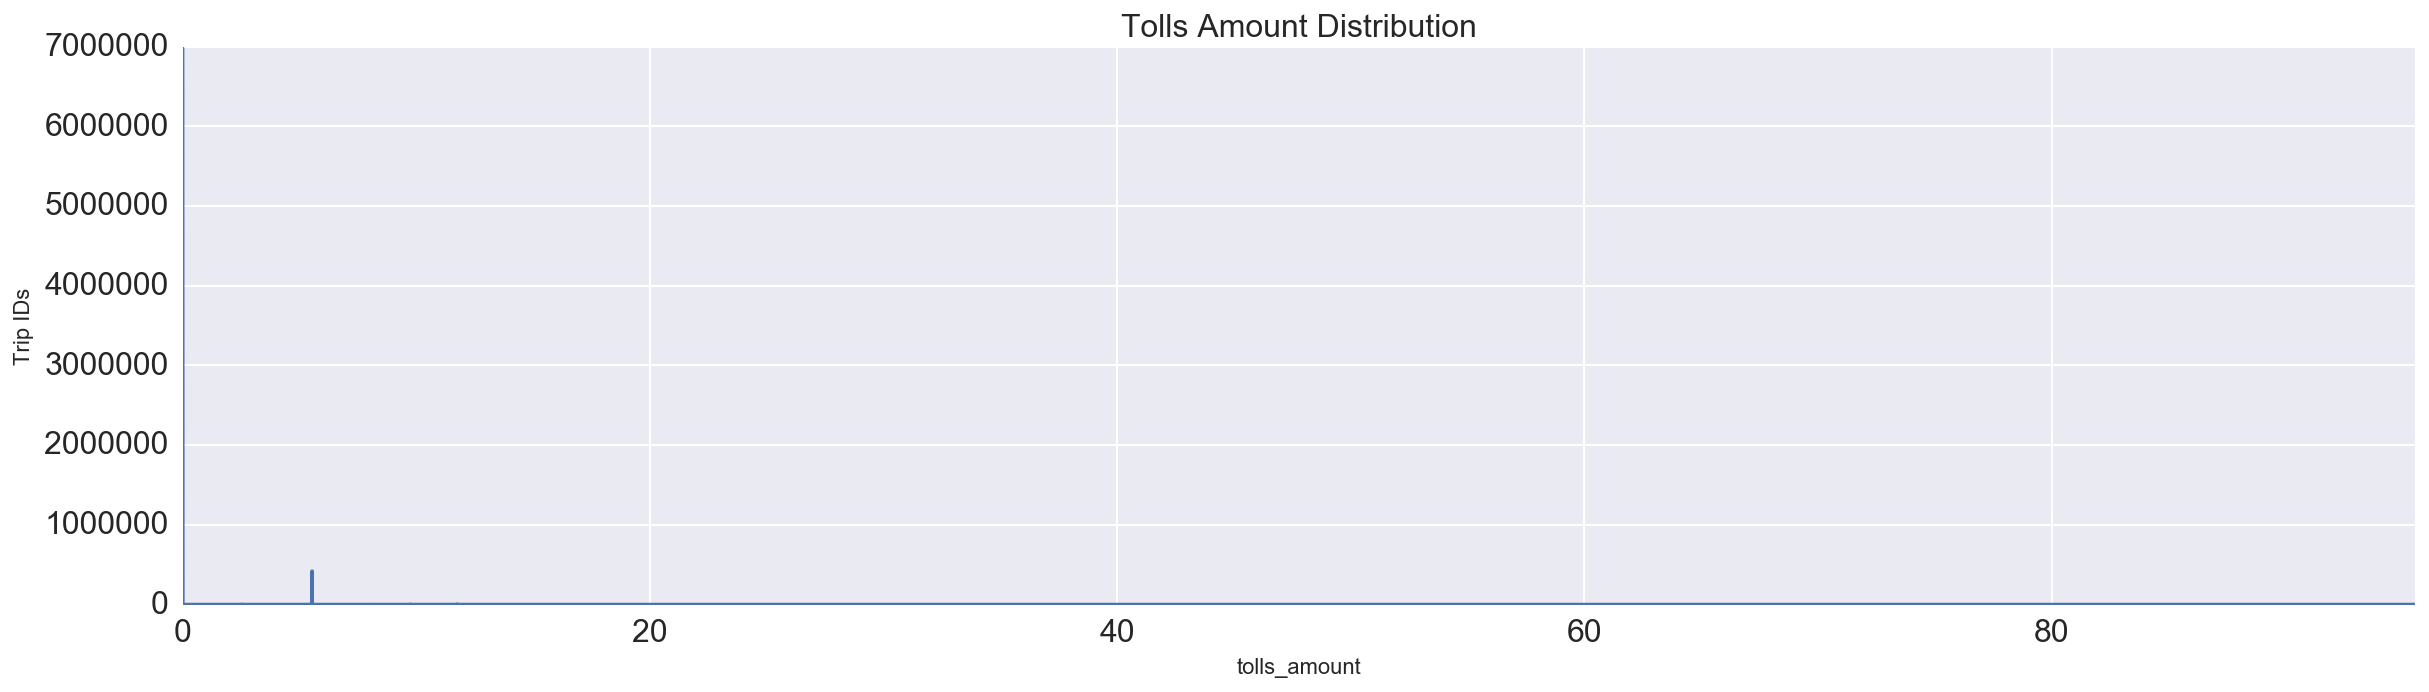

In [346]:
axes_tolls = trip_d_data.groupby(['tolls_amount'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_tolls.set_title('Tolls Amount Distribution', fontsize = 16)
axes_tolls.set_ylabel('Trip IDs')

By filtering tolls amount between \$0 and \$10, we cover the main amounts comprised within the entire set of filtered trips. 

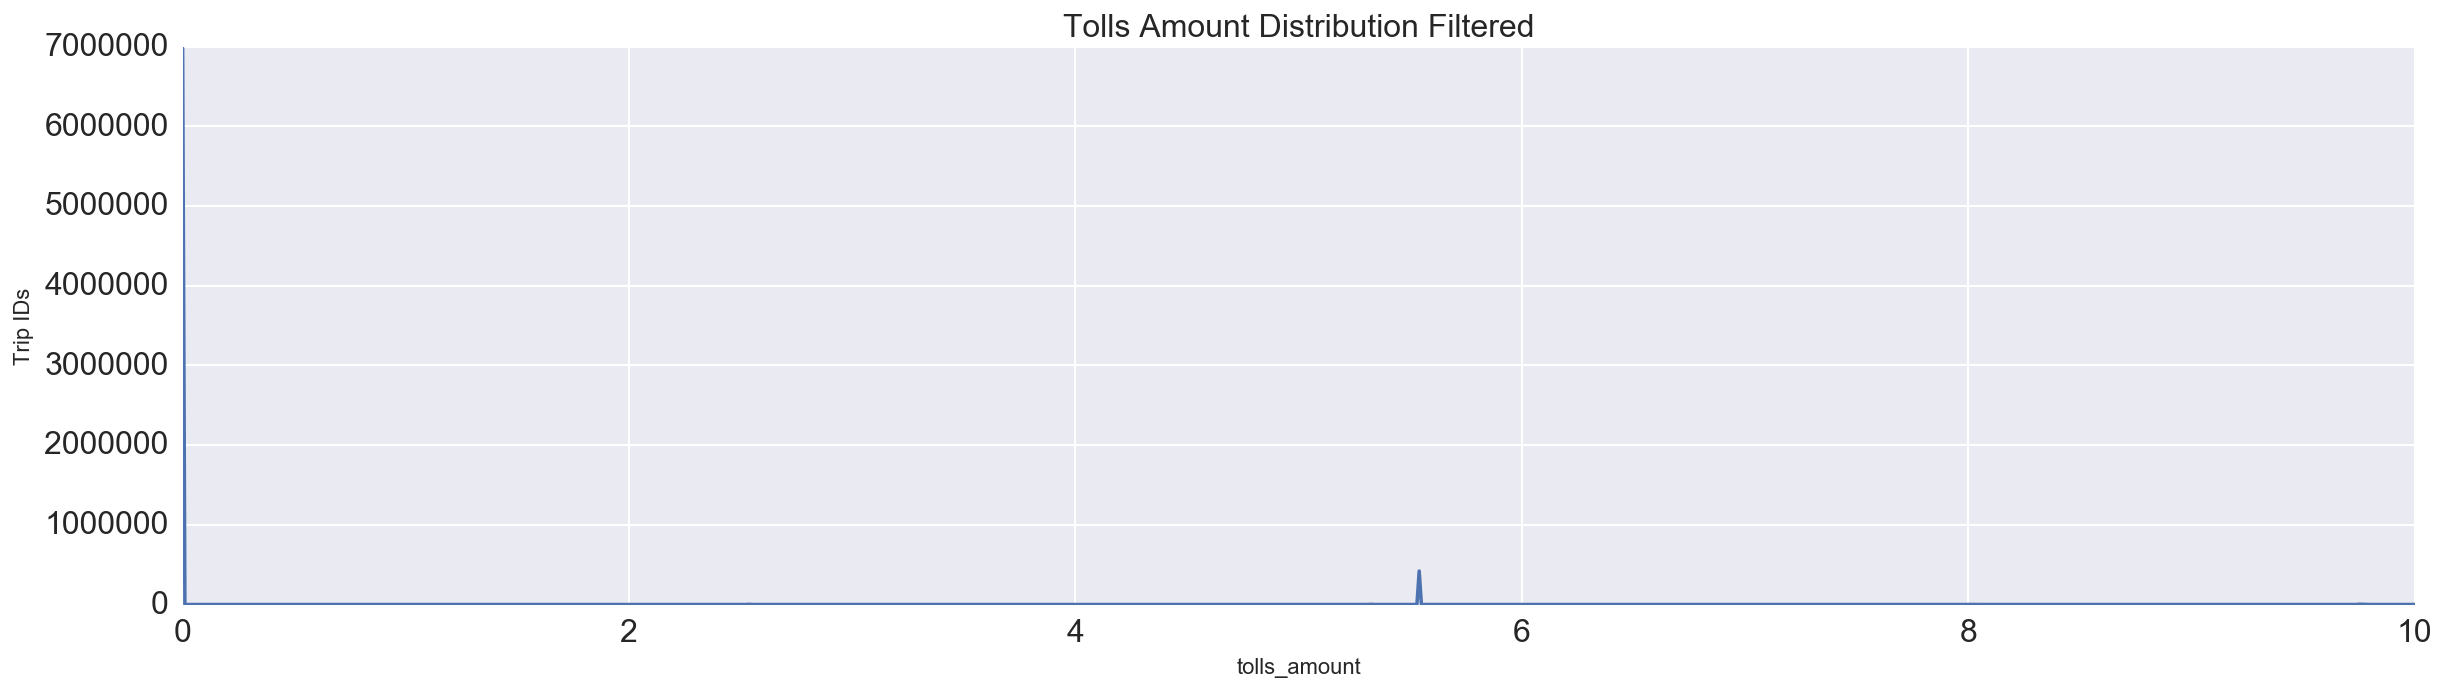

In [347]:
tolls_data = trip_d_data.loc[(trip_d_data.tolls_amount >=0 ) & (trip_d_data.tolls_amount <= 10)]
zoom_axes_tolls = tolls_data.groupby(['tolls_amount'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_tolls.set_title('Tolls Amount Distribution Filtered', fontsize = 16)
zoom_axes_tolls.set_ylabel('Trip IDs')

# 1.3.6 Extra Distribution


From this field we do not have enough information to determine whether a the extra amount paid by the user is or is not an outlier. However, the distribution depicted below illustrates that most of the data is concentrated within \$0 and \$50.

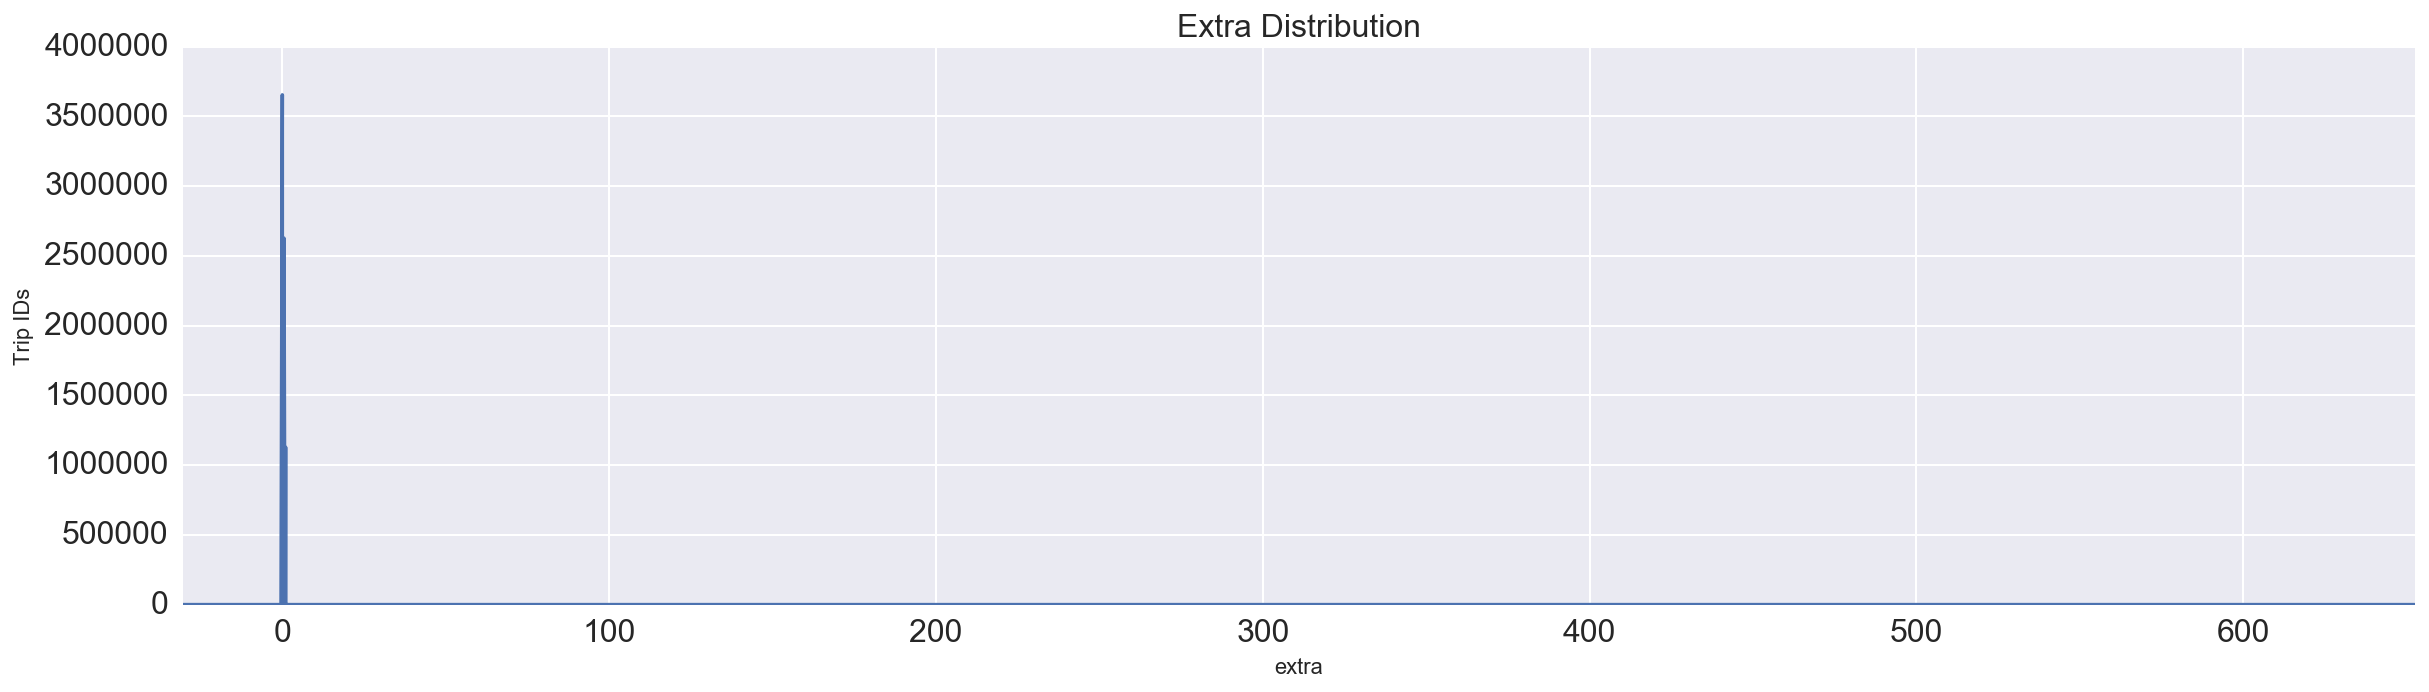

In [354]:
axes_extra = tolls_data.groupby(['extra'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_extra.set_title('Extra Distribution', fontsize = 16)
axes_extra.set_ylabel('Trip IDs')

According to the plot shown below, the range between \$0 and $5 comprises the most common extra amounts paid in each of the trips under analysis.

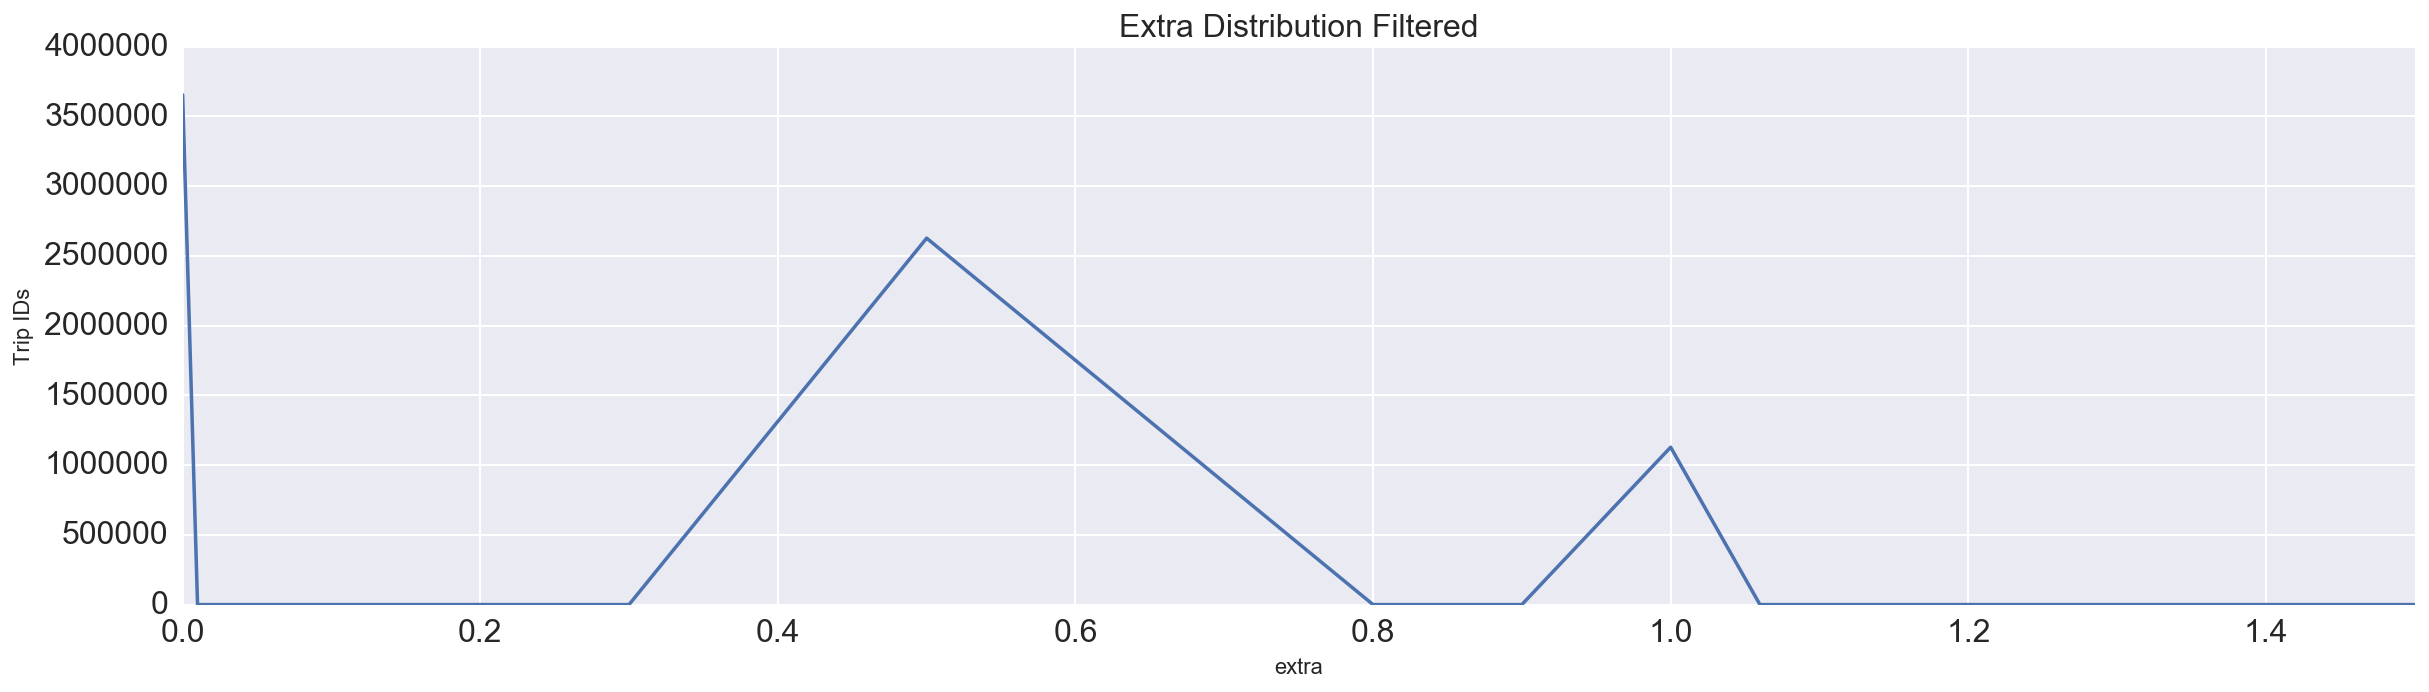

In [359]:
extra_data = tolls_data.loc[(tolls_data.extra >= 0 ) & (tolls_data.extra <= 1.5)]
zoom_axes_extra = extra_data.groupby(['extra'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_extra.set_title('Extra Distribution Filtered', fontsize = 16)
zoom_axes_extra.set_ylabel('Trip IDs')

Number of outliers filtered from the extra distribution are 17 

In [363]:
print 'Number of outliers: ', len(tolls_data) - len(extra_data)

Number of outliers:  17


# 1.3.7 Passenger Count Distribution

According to this distribution we can notice that the number of passengers varies from 1 to 9 passengers. However, the NYC Taxi & Limousine Commision states in their website (http://www.nyc.gov/html/tlc/html/faq/faq_pass.shtml#3) that the number of passengers that can fit a yellow taxicab is by law maximum 5 people, except that an additional passenger must be accepted if such passenger is under the age of 7 years old.  

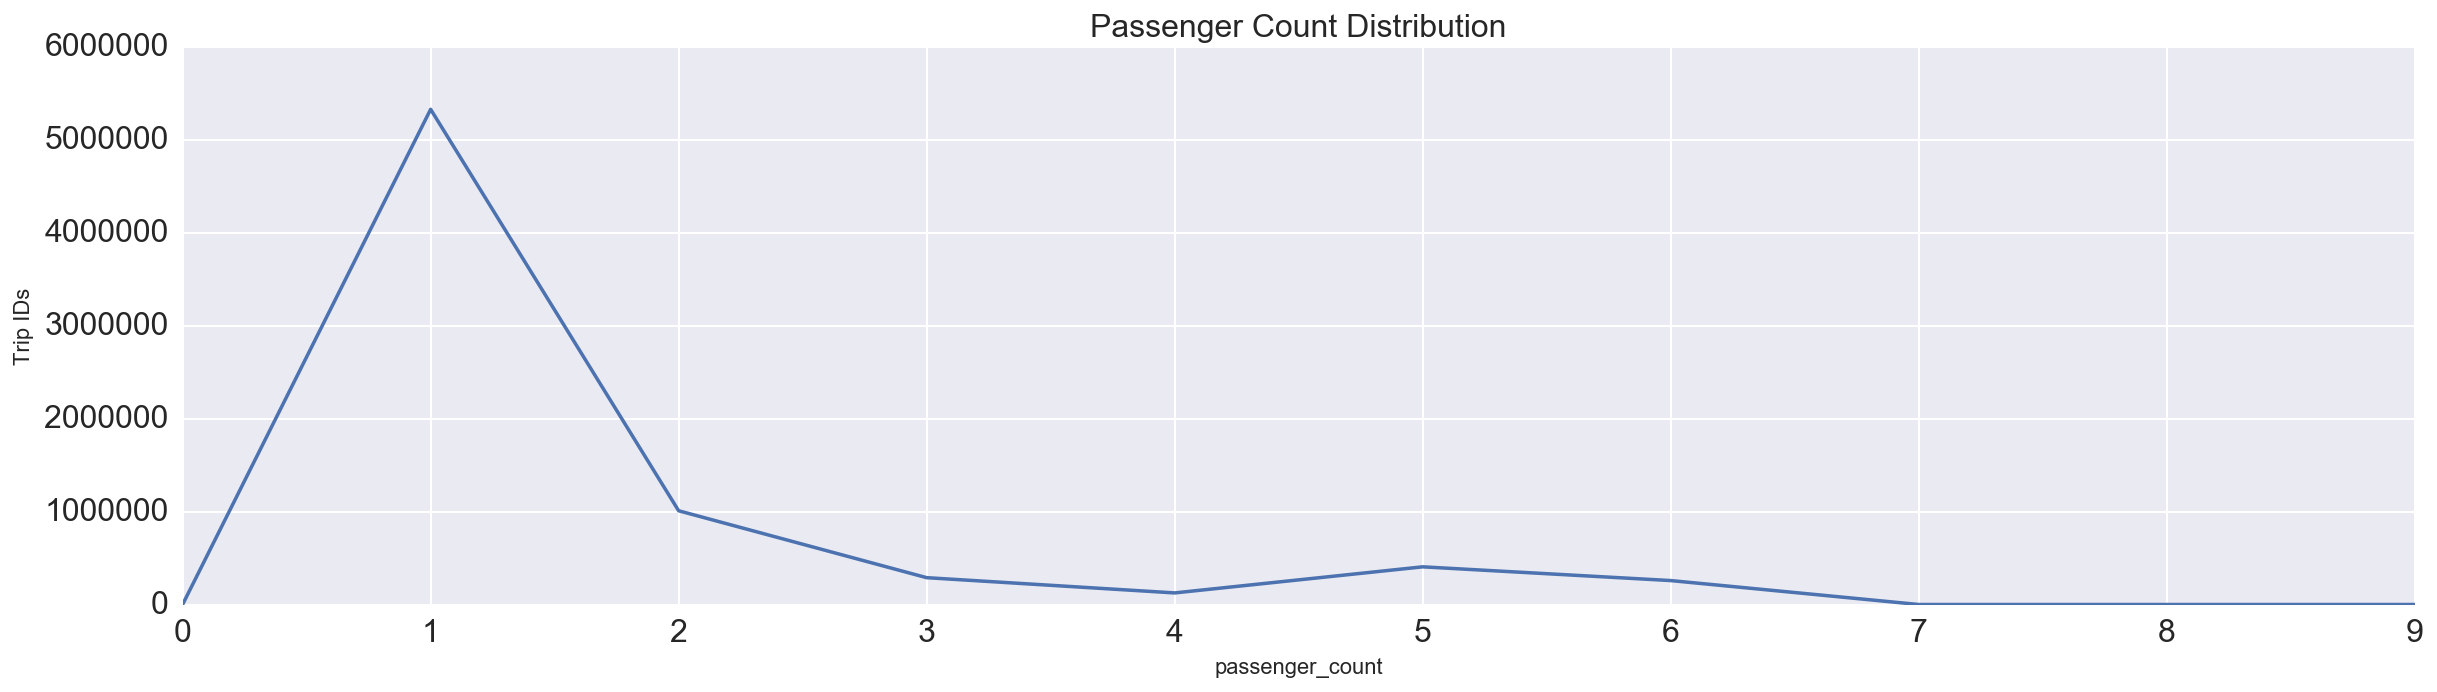

In [372]:
axes_passenger = extra_data.groupby(['passenger_count'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_passenger.set_title('Passenger Count Distribution', fontsize = 16)
axes_passenger.set_ylabel('Trip IDs')

Therefore, according to the statement made by the NYC Taxi & Limousine Commision, we set the number of passengers between 1 up to 6 passengers. 

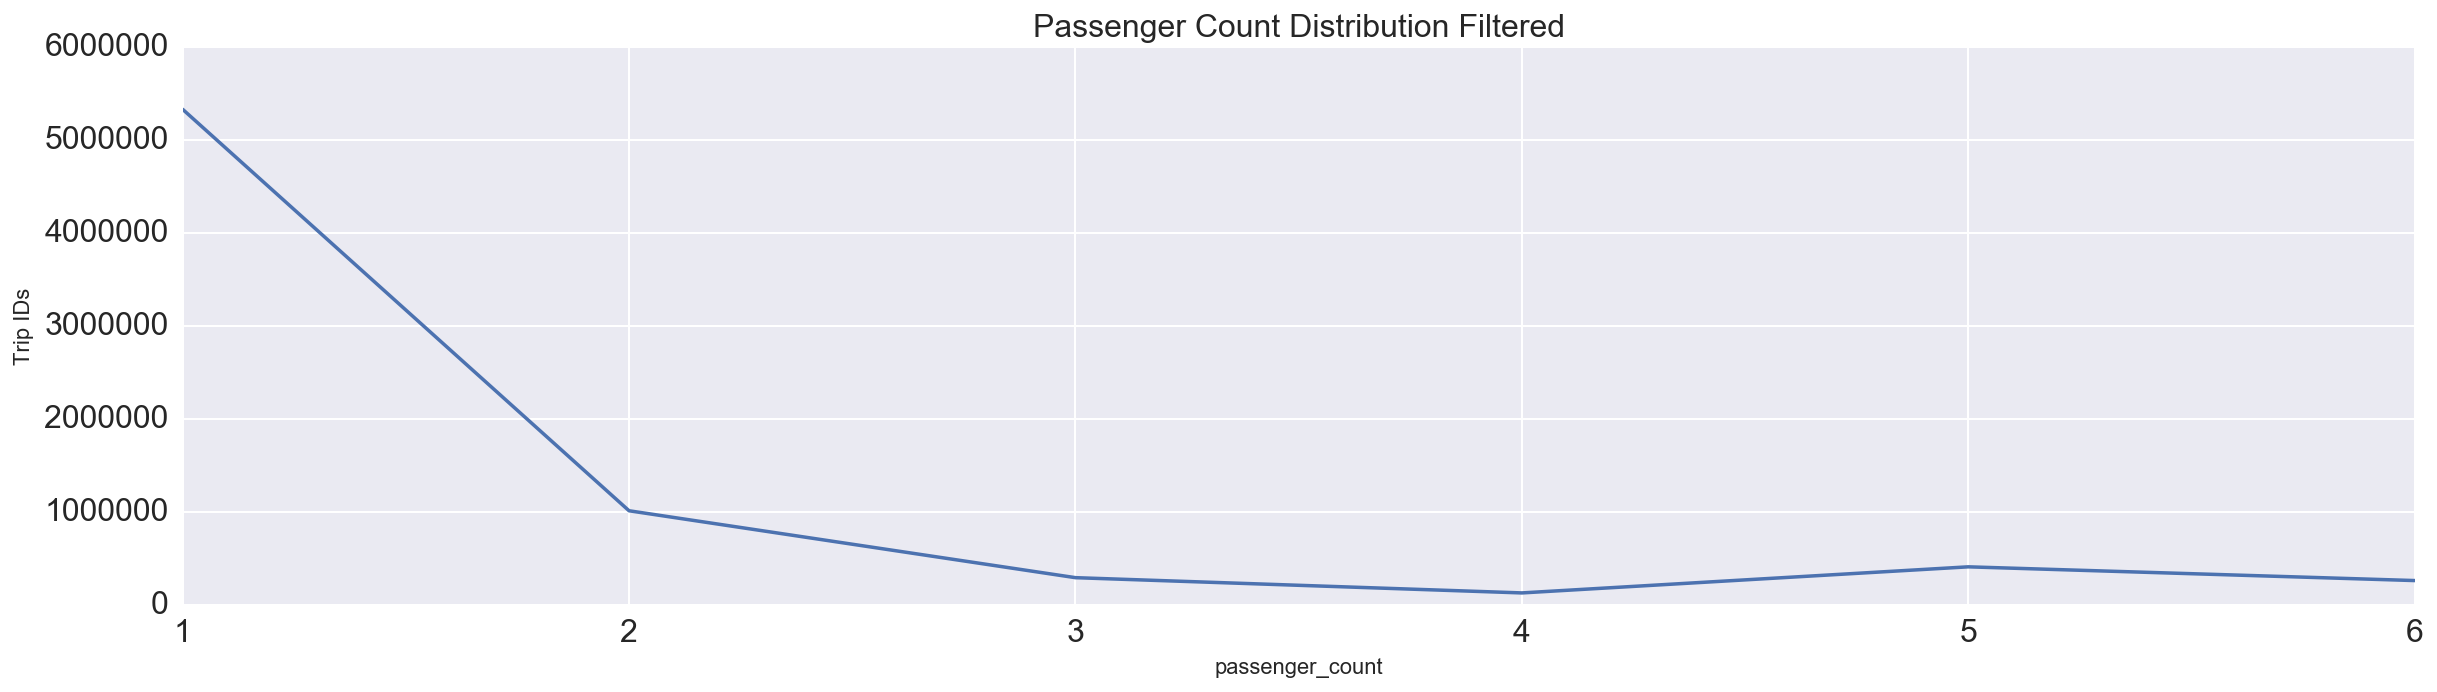

In [373]:
passenger_data = extra_data.loc[(extra_data.passenger_count >= 1 ) & (extra_data.passenger_count <= 6)]
zoom_axes_passenger = passenger_data.groupby(['passenger_count'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_passenger.set_title('Passenger Count Distribution Filtered', fontsize = 16)
zoom_axes_passenger.set_ylabel('Trip IDs')

The trips that meet this criteria are over 7.4 million trips. 

In [367]:
print 'Trips with 1-5 passengers: ',len(passenger_data)

Trips with 1-5 passengers:  7408400


# 1.3.7 Mta Tax Distribution

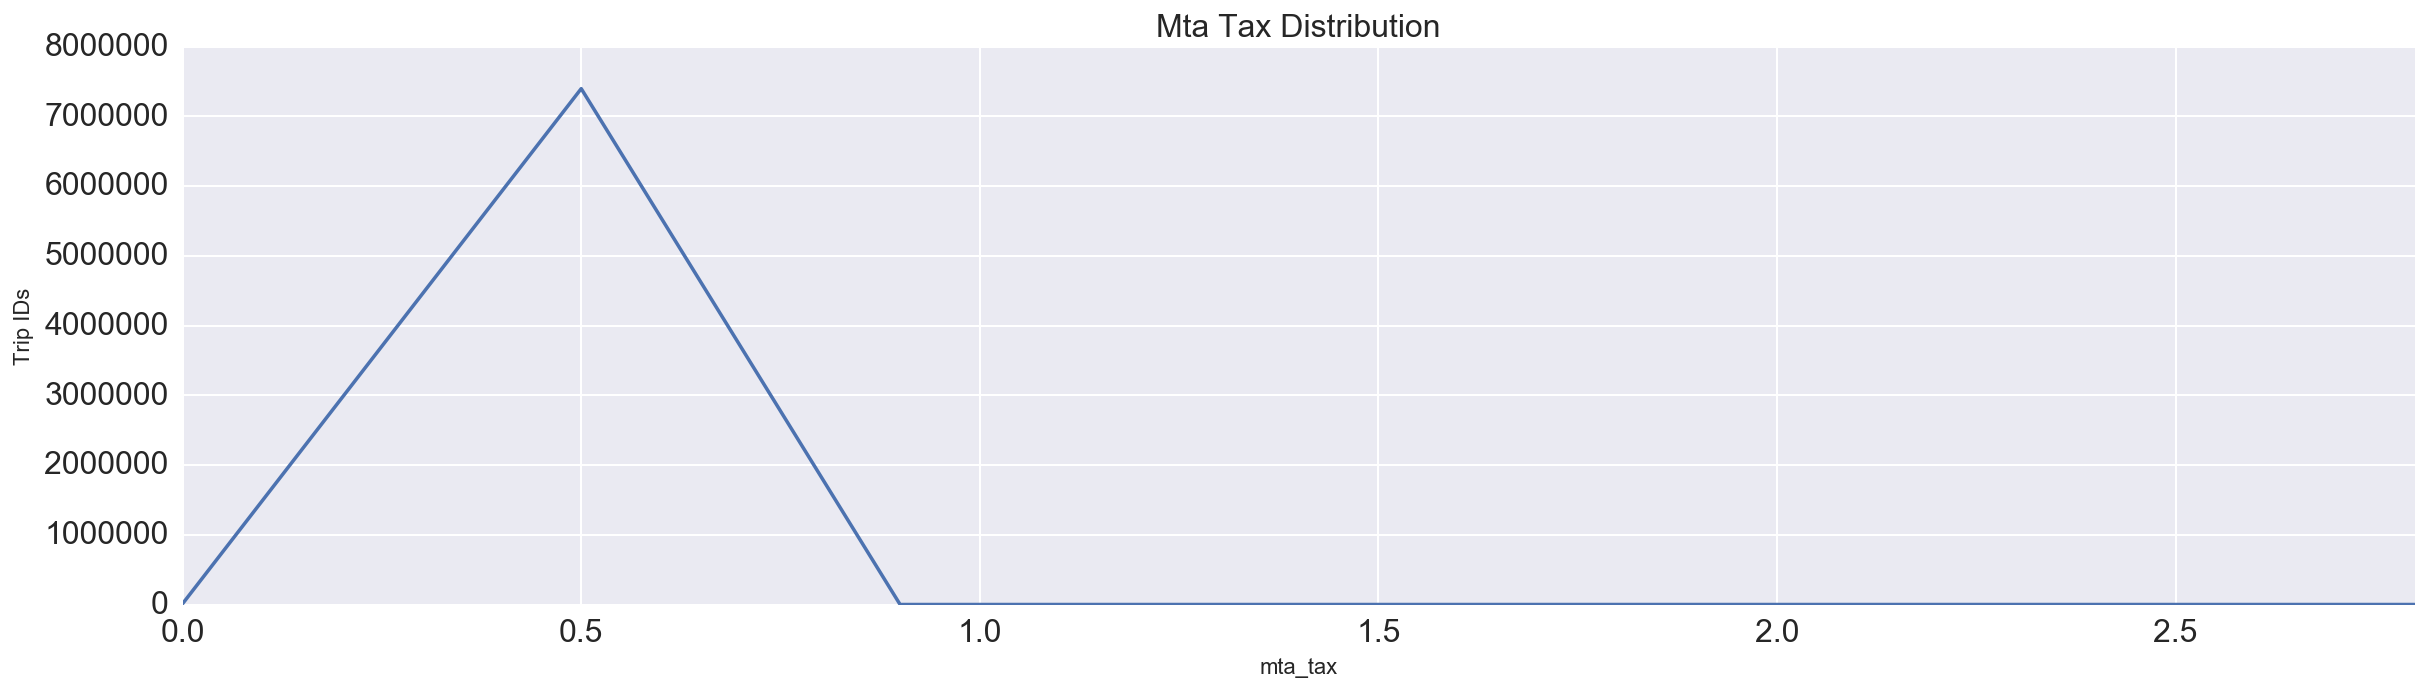

In [391]:
axes_mta = passenger_data.groupby(['mta_tax'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
axes_mta.set_title('Mta Tax Distribution', fontsize = 16)
axes_mta.set_ylabel('Trip IDs')

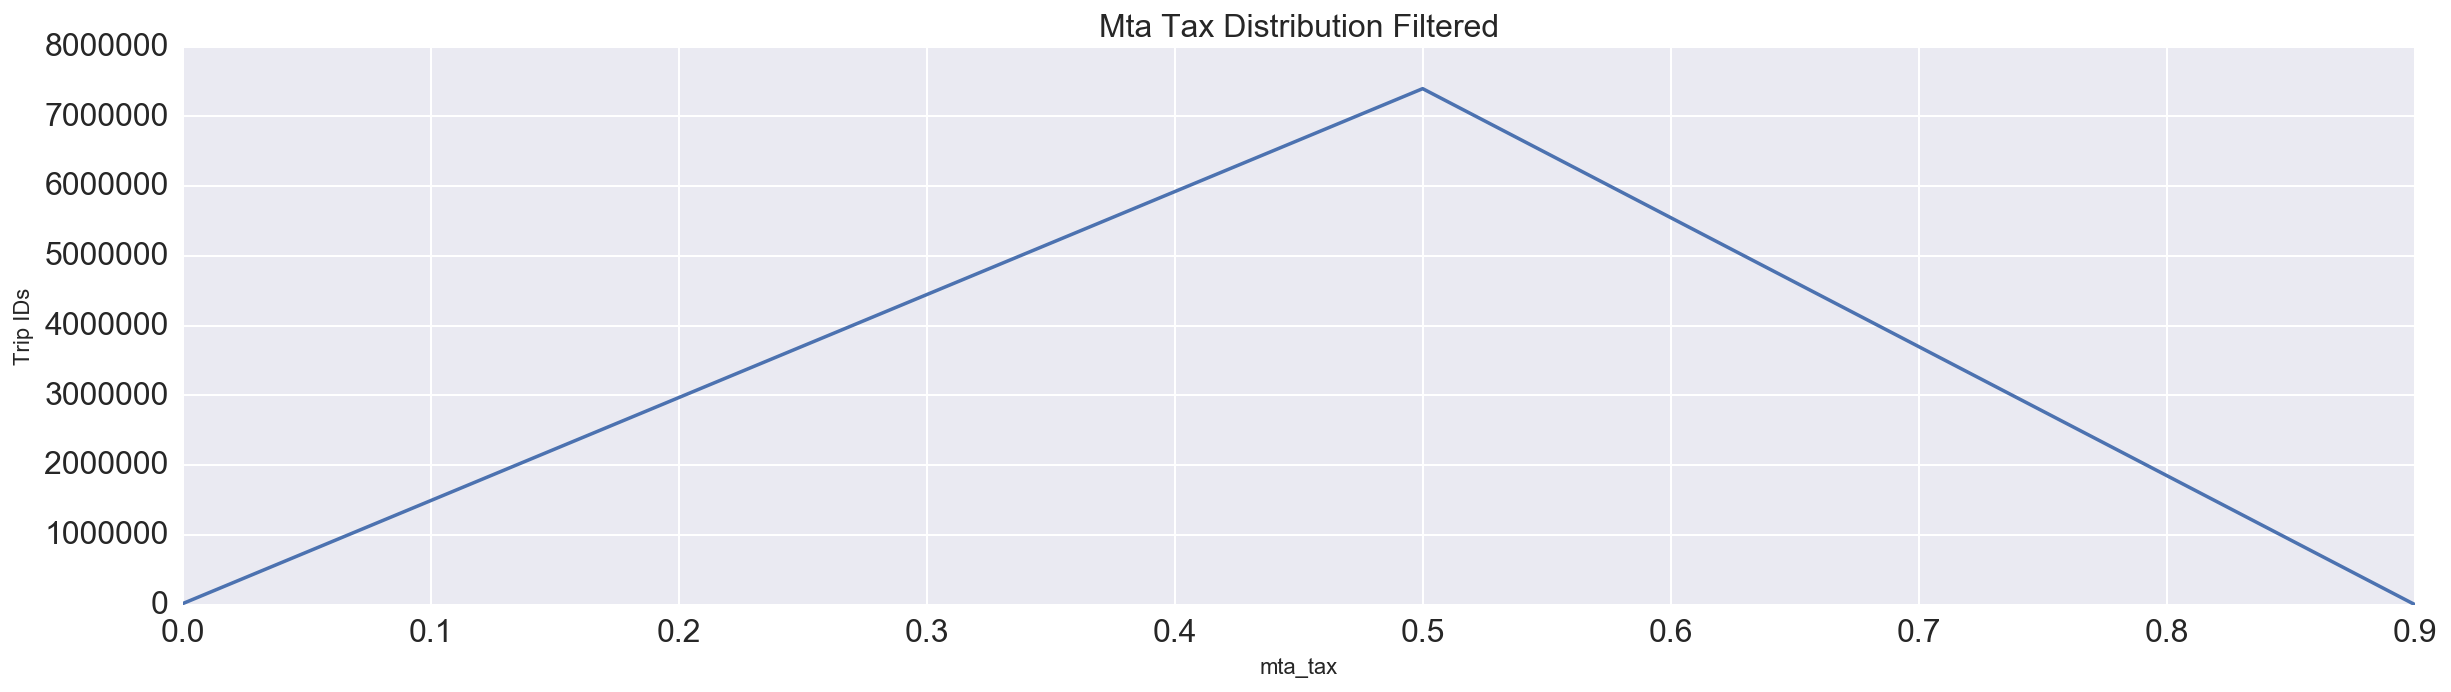

In [392]:
mta_data = passenger_data.loc[(passenger_data.mta_tax >= 0 ) & (passenger_data.mta_tax <= 1)]
zoom_axes_mta = mta_data.groupby(['mta_tax'] ).size().plot(kind='line', figsize=(20,5), fontsize = 16)
zoom_axes_mta.set_title('Mta Tax Distribution Filtered', fontsize = 16)
zoom_axes_mta.set_ylabel('Trip IDs')

From the Mta Tax distribution we have just found 1 outlier.

In [385]:
print "Number of outliers: ", len(passenger_data) - len(mta_data)

Number of outliers:  1


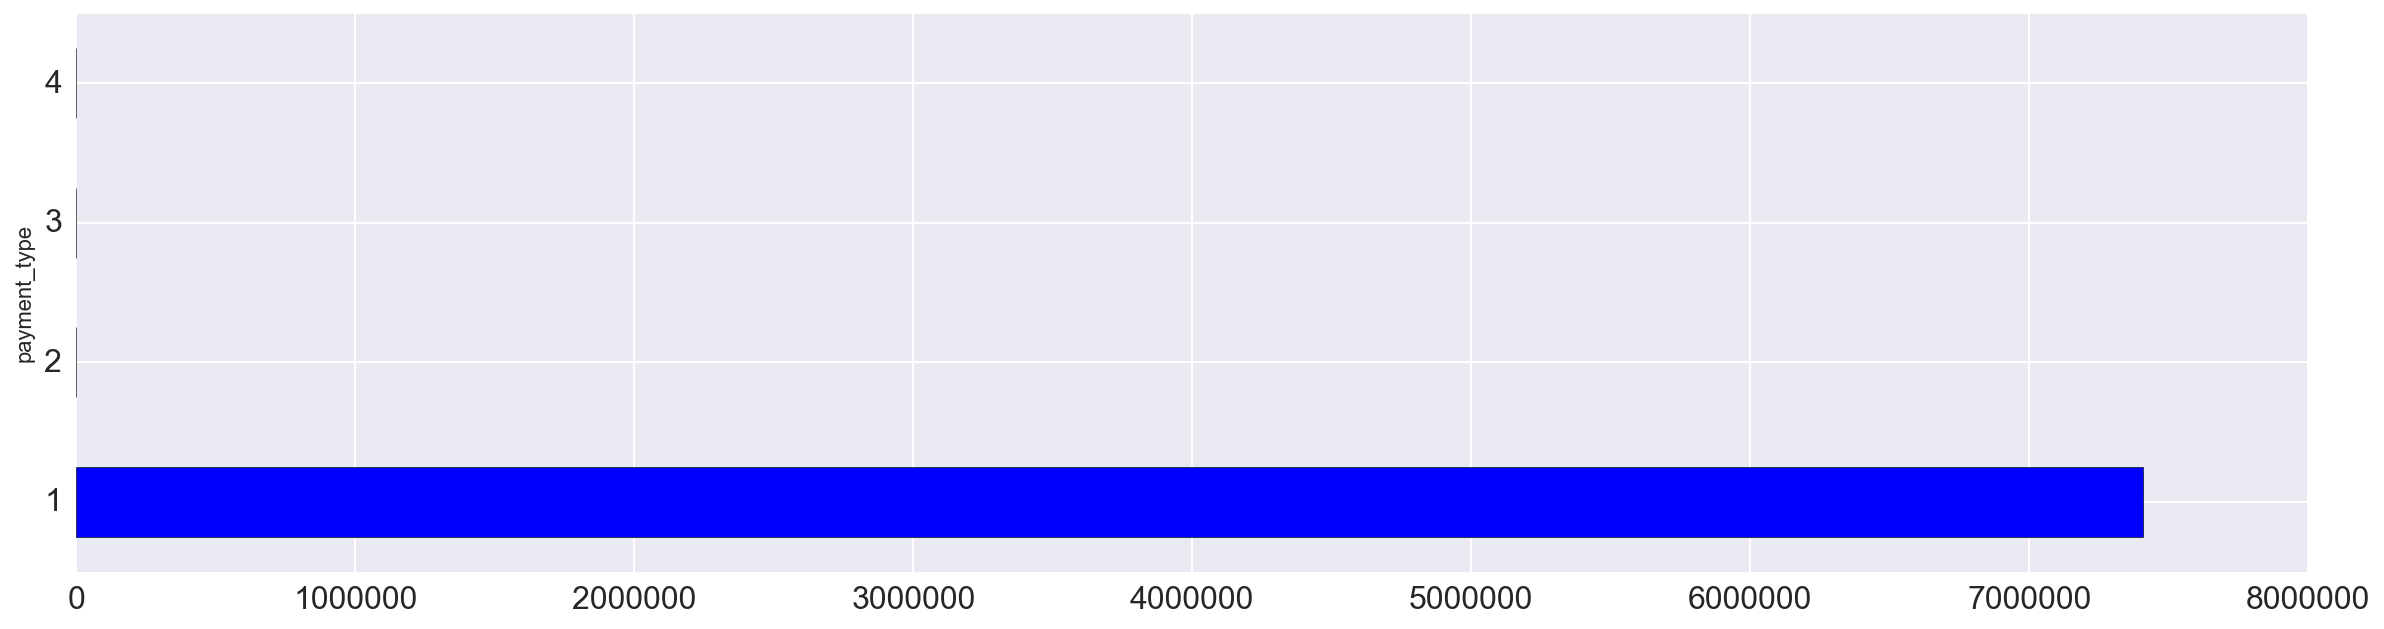

In [398]:
axes_payment = mta_data.groupby(['payment_type'] ).size().plot(kind='barh', figsize=(20,5), fontsize = 16)

We consider that an average passenger have paid either with credit card or cash. However, we have 4 types of payment by which we will assume there are only the common types of payment mentioned before. Since we do not have any idea of which of the 4 types represent the credit card and the cash payment, we will keep the types with the highest frequencies. It is clear that type number 1 is the most common way passengers have paid, then we will analyse the remaining types of data.

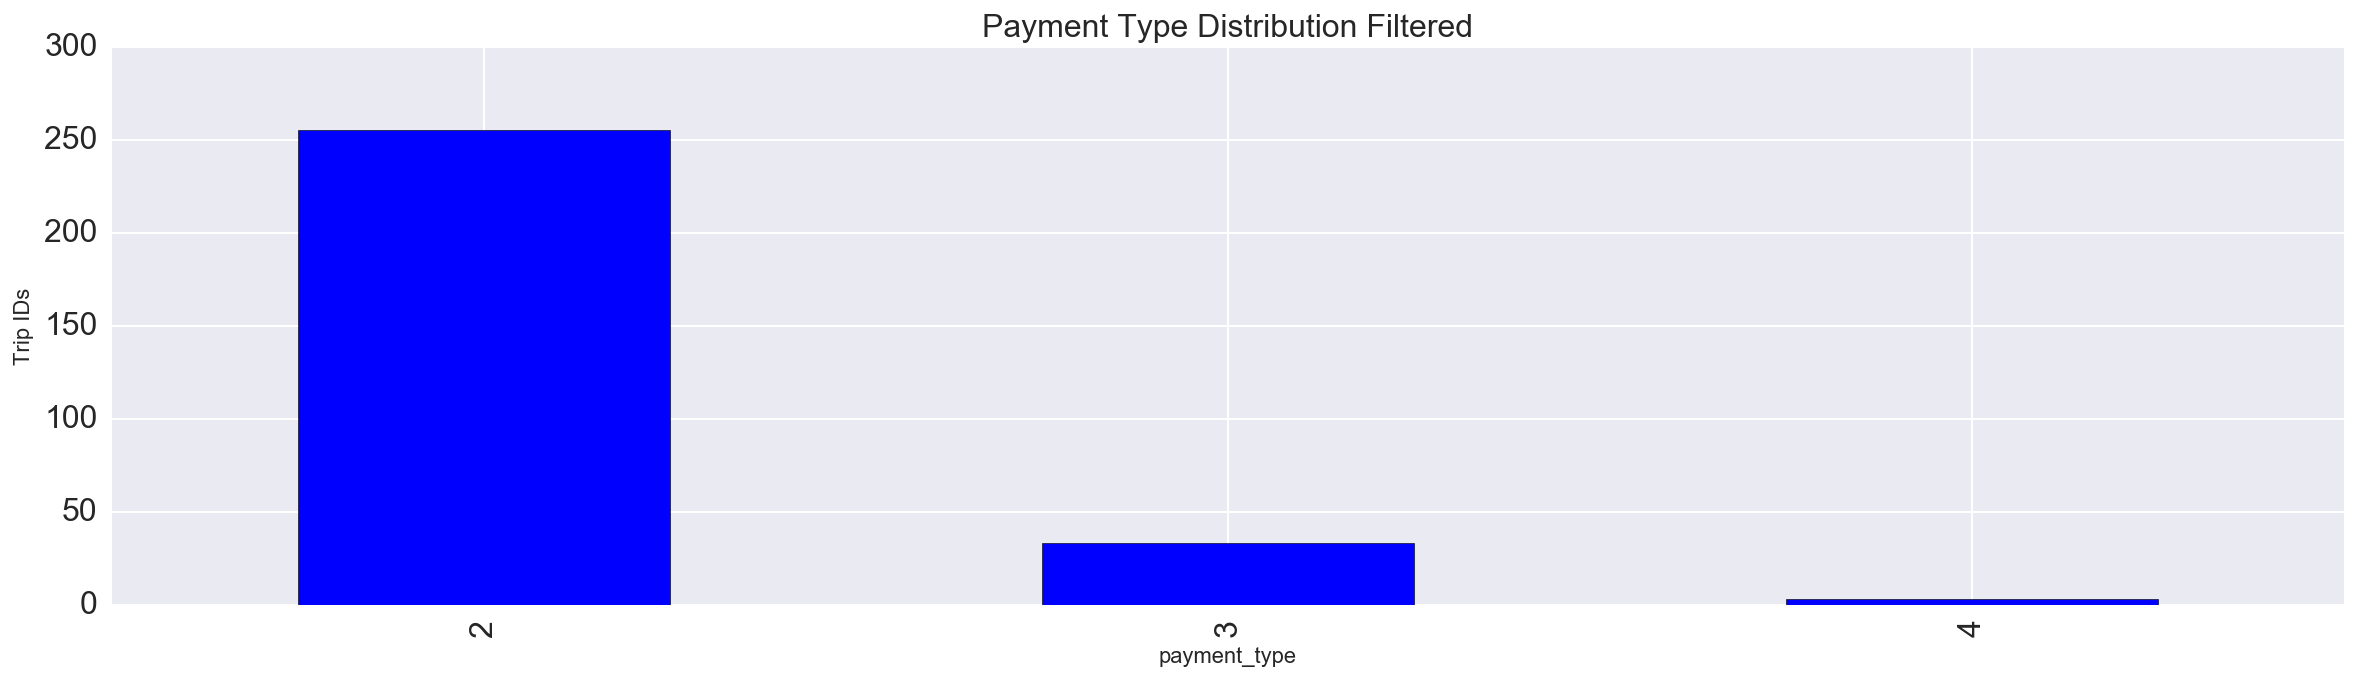

In [411]:
payment_data = mta_data.loc[(mta_data.payment_type >= 2 ) & (mta_data.payment_type <= 4)]
zoom_axes_payment = payment_data.groupby(['payment_type'] ).size().plot(kind='bar', figsize=(20,5), fontsize = 16)
zoom_axes_payment.set_title('Payment Type Distribution Filtered', fontsize = 16)
zoom_axes_payment.set_ylabel('Trip IDs')

Based on this results we consider that types 1 and 2 are payments with credit card and cash. Therefore, we assume that types 3 and 4 are outliers from this distribution.

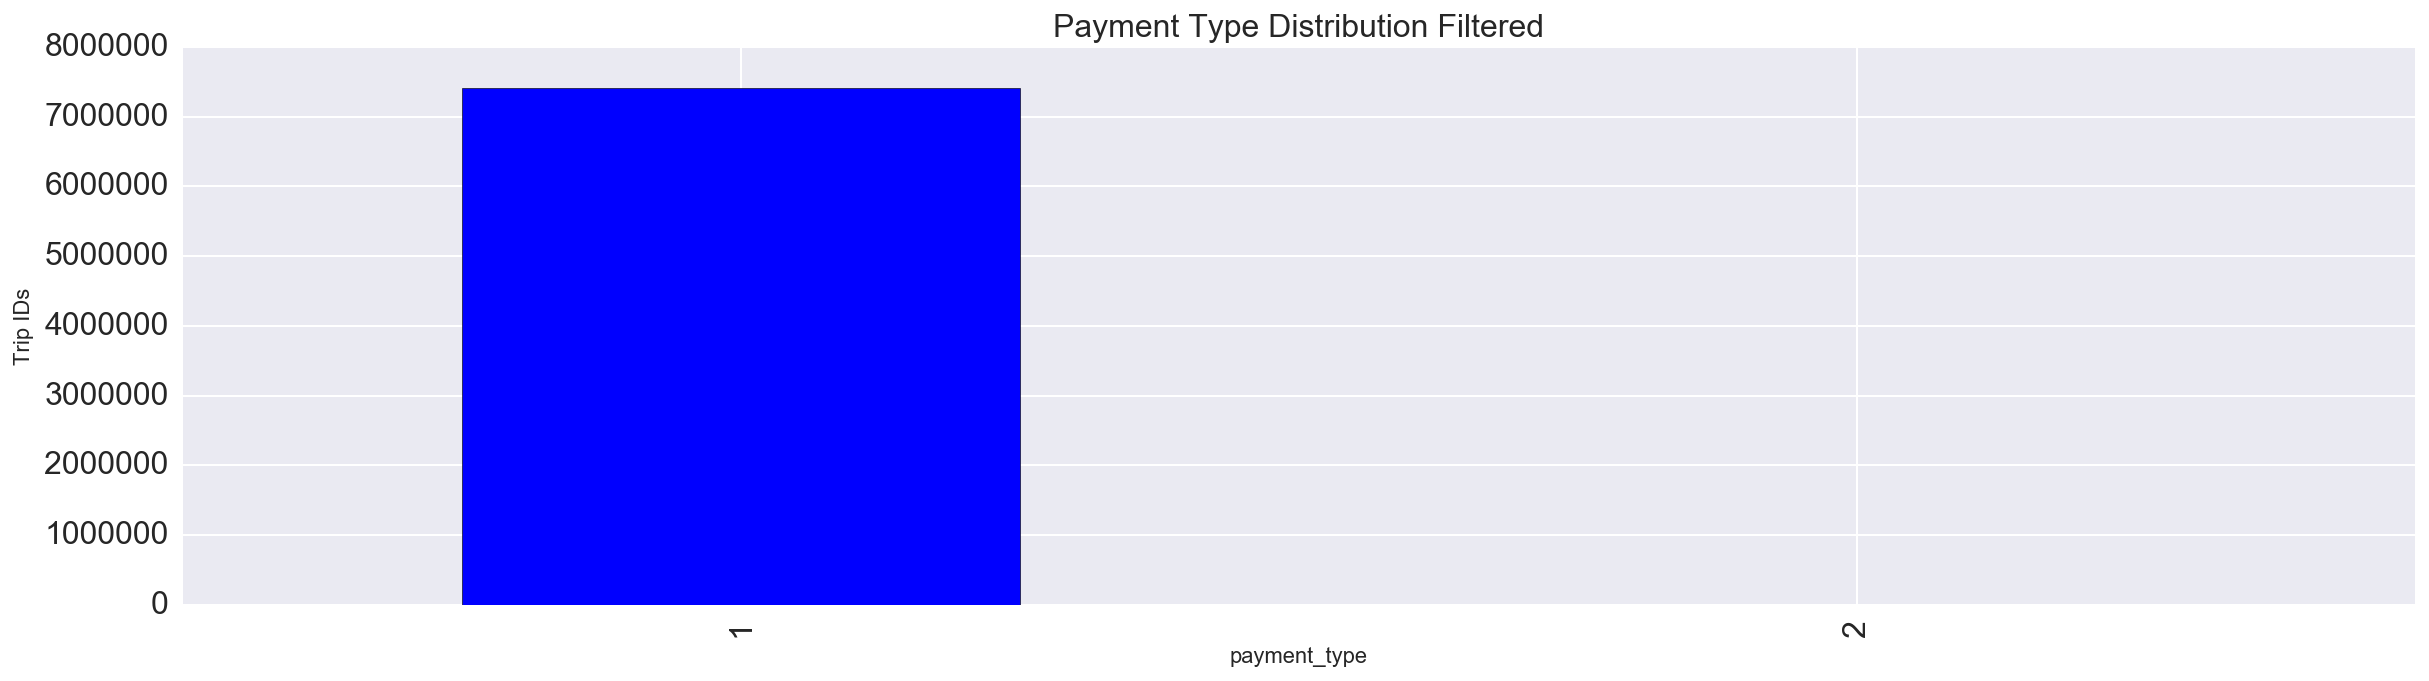

In [413]:
payment_data = mta_data.loc[(mta_data.payment_type >= 1 ) & (mta_data.payment_type <= 2)]
zoom_axes_payment = payment_data.groupby(['payment_type'] ).size().plot(kind='bar', figsize=(20,5), fontsize = 16)
zoom_axes_payment.set_title('Payment Type Distribution Filtered', fontsize = 16)
zoom_axes_payment.set_ylabel('Trip IDs')

After finishing the filtering process, the cleaned dataset contained the most representative information from the raw dataset. 

In summary, we have filtered almost 40% of the total number of trips we had initially. Therefore, this critical situation may be a big concern that can indicate some deficiency in the manner trips information is acquired and validated by the NYC Taxi & Limousine Commision.

In [437]:
cleaned_dataset = payment_data
raw_trips = len(raw_data)
representative_trips = len(cleaned_dataset)
outliers_per = 100 - float(representative_trips) / raw_trips * 100

print 'Number of trips in the raw dataset: ', raw_trips
print 'Number of trips in the cleand dataset: ', representative_trips
print 'Porcentage of outliers contained in the raw dataset: ',  "%.2f" % outliers_per , "%"

Number of trips in the raw dataset:  12324935
Number of trips in the cleand dataset:  7408363
Porcentage of outliers contained in the raw dataset:  39.89 %


Finally, the statistical analysis of the cleaned dataset, shows more consistency within the distribution of each of the fields registered. 

In [438]:
cleaned_dataset.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000,7408363.000000
mean,1.520651,1.656896,3.104603,-72.953742,40.187799,1.032025,-73.078767,40.257282,1.000034,13.386255,0.329560,0.499148,2.810535,0.323854,0.299962,17.649315
std,0.499573,1.324919,3.513569,8.632347,4.754911,0.431262,8.096822,4.465636,0.005867,10.099118,0.363751,0.020629,2.340539,1.307485,0.003368,13.014641
min,1.000000,1.000000,0.000000,-171.797348,-67.136963,1.000000,-754.166687,-16.177874,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.310000
25%,1.000000,1.000000,1.100000,-73.992485,40.735054,1.000000,-73.991753,40.733467,1.000000,7.000000,0.000000,0.500000,1.460000,0.000000,0.300000,9.800000
50%,2.000000,1.000000,1.890000,-73.981972,40.752117,1.000000,-73.980164,40.752468,1.000000,10.000000,0.500000,0.500000,2.040000,0.000000,0.300000,13.500000
75%,2.000000,2.000000,3.400000,-73.967621,40.767521,1.000000,-73.963699,40.768375,1.000000,15.500000,0.500000,0.500000,3.160000,0.000000,0.300000,19.800000
max,2.000000,6.000000,23.000000,149.028534,69.702576,99.000000,112.280441,483.450012,2.000000,80.000000,1.500000,0.900000,30.000000,10.000000,0.700000,118.050000
